In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

reading data + basic info:

In [231]:
df = pd.read_csv('../data/raw/sales_ads_train.csv')

print('dataframe shape: {}'.format(df.shape))
df.head()

dataframe shape: (135397, 25)


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,...,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,...,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,...,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,...,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,...,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


In [206]:
df.columns

Index(['ID', 'Cena', 'Waluta', 'Stan', 'Marka_pojazdu', 'Model_pojazdu',
       'Wersja_pojazdu', 'Generacja_pojazdu', 'Rok_produkcji', 'Przebieg_km',
       'Moc_KM', 'Pojemnosc_cm3', 'Rodzaj_paliwa', 'Emisja_CO2', 'Naped',
       'Skrzynia_biegow', 'Typ_nadwozia', 'Liczba_drzwi', 'Kolor',
       'Kraj_pochodzenia', 'Pierwszy_wlasciciel', 'Data_pierwszej_rejestracji',
       'Data_publikacji_oferty', 'Lokalizacja_oferty', 'Wyposazenie'],
      dtype='object')

In [205]:
df["Cena"].max()

np.int64(6999000)

First_Owner    Yes  no_info
Stan                       
New           0.82    11.18
Used         28.65    56.89
unknown       0.73     1.73


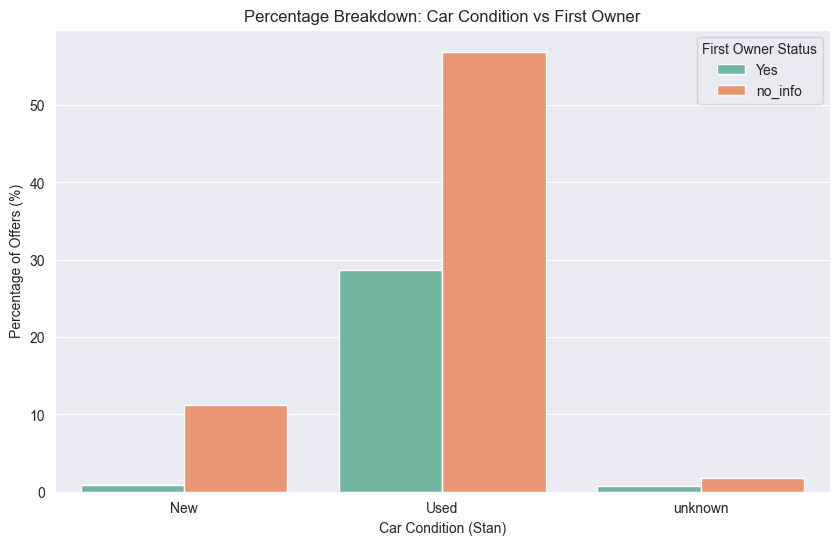

In [263]:

# Sample DataFrame (replace this with your actual data)
# df = pd.DataFrame({
#     'Stan': ['new', 'used', 'new', 'used', 'new', 'new', 'used', 'null'],
#     'First_Owner': ['yes', 'yes', 'null', 'yes', 'yes', 'null', 'null', 'null']
# })

# Handle missing values explicitly for clarity
df['Condition'] = df['Stan'].fillna('unknown')
df['First_Owner'] = df['Pierwszy_wlasciciel'].fillna('no_info')

# Create a crosstab to show counts of each combination
combo_counts = pd.crosstab(df['Stan'], df['First_Owner'])

# Convert counts to percentages
combo_percent = combo_counts.div(combo_counts.sum().sum()).multiply(100).round(2)
print(combo_percent)

# Melt for better visualization
combo_melted = combo_percent.reset_index().melt(id_vars='Stan', var_name='First_Owner', value_name='Percentage')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=combo_melted, x='Stan', y='Percentage', hue='First_Owner', palette='Set2')

plt.title('Percentage Breakdown: Car Condition vs First Owner')
plt.ylabel('Percentage of Offers (%)')
plt.xlabel('Car Condition (Stan)')
plt.legend(title='First Owner Status')

plt.show()


finding data types, missing values (if any):

In [135]:
print(df["Stan"].value_counts())
print(df["Stan"].isna().sum())
print(df["Pierwszy_wlasciciel"].value_counts())
print(df["Pierwszy_wlasciciel"].isna().sum())

Stan
Used    115824
New      16251
Name: count, dtype: int64
3322
Pierwszy_wlasciciel
Yes    40883
Name: count, dtype: int64
94514


Those columns have contradicting values, if the car is used then it can't be the first owner.

Let's check the unique values for each column:

In [13]:
cat_features = [
            "Waluta", "Stan", "Marka_pojazdu", "Model_pojazdu", "Wersja_pojazdu",
            "Generacja_pojazdu", "Rodzaj_paliwa", "Naped", "Skrzynia_biegow",
            "Typ_nadwozia", "Kolor", "Kraj_pochodzenia", "Lokalizacja_oferty", "Pierwszy_wlasciciel",
        ]

for col in cat_features:
    print(f"unique values for {col}:")
    print(len(df[col].unique()), df[col].unique())

unique values for Waluta:
2 ['PLN' 'EUR']
unique values for Stan:
2 ['Used' 'New']
unique values for Marka_pojazdu:
32 ['Škoda' 'Toyota' 'BMW' 'Volkswagen' 'Ford' 'Nissan' 'Fiat'
 'Mercedes-Benz' 'Volvo' 'Opel' 'Hyundai' 'Audi' 'Renault' 'Seat' 'Mazda'
 'Citroën' 'Porsche' 'Mitsubishi' 'Kia' 'Peugeot' 'Honda' 'Dacia' 'Suzuki'
 'Jaguar' 'Saab' 'Land Rover' 'Jeep' 'Smart' 'Lexus' 'Subaru' 'Lancia'
 'Chrysler']
unique values for Model_pojazdu:
183 ['Octavia' 'Avensis' 'Corolla' 'Superb' 'Seria 3' 'Passat' 'Transporter'
 'Golf' 'S-Max' 'Qashqai' 'Tipo' 'Fabia' 'X4' 'Kuga' 'Klasa E' 'XC 90'
 'Insignia' 'Fiesta' 'Seria 5' 'Sharan' 'Yaris' 'Corsa' 'I30' 'Q7' 'V40'
 'Combo' 'Meriva' 'Trafic' 'A6' 'Leon' 'Touran' 'Zafira' 'Galaxy' '6' 'A4'
 'CLS' 'Aygo' 'Klasa C' 'Focus' 'Auris' '3' 'Megane' 'A3' 'C4 Picasso'
 'Astra' 'Cayenne' 'C5' 'Vectra' 'Toledo' 'Mondeo' 'C3' 'Lancer' 'Sorento'
 'Bravo' '308' 'Ceed' 'Civic' 'Q5' 'Tiguan' 'Ibiza' 'Note' 'Clio' 'X1'
 'Logan' 'SX4' 'XF' 'Accord' 'S80' '9-3' '

In [3]:
print('info on data: {}'.format(df.info()))

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135397 entries, 0 to 135396
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          135397 non-null  int64  
 1   Cena                        135397 non-null  int64  
 2   Waluta                      132021 non-null  object 
 3   Stan                        132075 non-null  object 
 4   Marka_pojazdu               132046 non-null  object 
 5   Model_pojazdu               132088 non-null  object 
 6   Wersja_pojazdu              87336 non-null   object 
 7   Generacja_pojazdu           93737 non-null   object 
 8   Rok_produkcji               131990 non-null  float64
 9   Przebieg_km                 131394 non-null  float64
 10  Moc_KM                      131664 non-null  float64
 11  Pojemnosc_cm3               130711 non-null  float64
 12  Rodzaj_paliwa               131987 non-null  object 
 13  Emisja_CO2    

,ID,Cena,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Emisja_CO2,Liczba_drzwi
count,135397.000000,1.353970e+05,131990.000000,1.313940e+05,131664.000000,130711.000000,5.949700e+04,131033.000000
mean,67699.000000,6.306938e+04,2012.089901,1.531563e+05,151.716696,1881.811753,3.363019e+05,4.635611
std,39085.891536,8.807748e+04,7.003557,3.421378e+06,77.386471,727.605417,8.199407e+07,0.780062
min,1.000000,5.850000e+02,1923.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,33850.000000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,67699.000000,3.580000e+04,2013.000000,1.448635e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,101548.000000,7.599000e+04,2017.000000,2.060000e+05,173.000000,1997.000000,1.640000e+02,5.000000
max,135397.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


missing values analysis:

In [4]:
missing_values = df.isnull().sum()

print('missing values in each col: {}'.format(missing_values))

missing values in each col: ID                                0
Cena                              0
Waluta                         3376
Stan                           3322
Marka_pojazdu                  3351
Model_pojazdu                  3309
Wersja_pojazdu                48061
Generacja_pojazdu             41660
Rok_produkcji                  3407
Przebieg_km                    4003
Moc_KM                         3733
Pojemnosc_cm3                  4686
Rodzaj_paliwa                  3410
Emisja_CO2                    75900
Naped                         13054
Skrzynia_biegow                3775
Typ_nadwozia                   3359
Liczba_drzwi                   4364
Kolor                          3463
Kraj_pochodzenia              60420
Pierwszy_wlasciciel           94514
Data_pierwszej_rejestracji    80698
Data_publikacji_oferty         3449
Lokalizacja_oferty             3341
Wyposazenie                    3253
dtype: int64


basic visualizations:

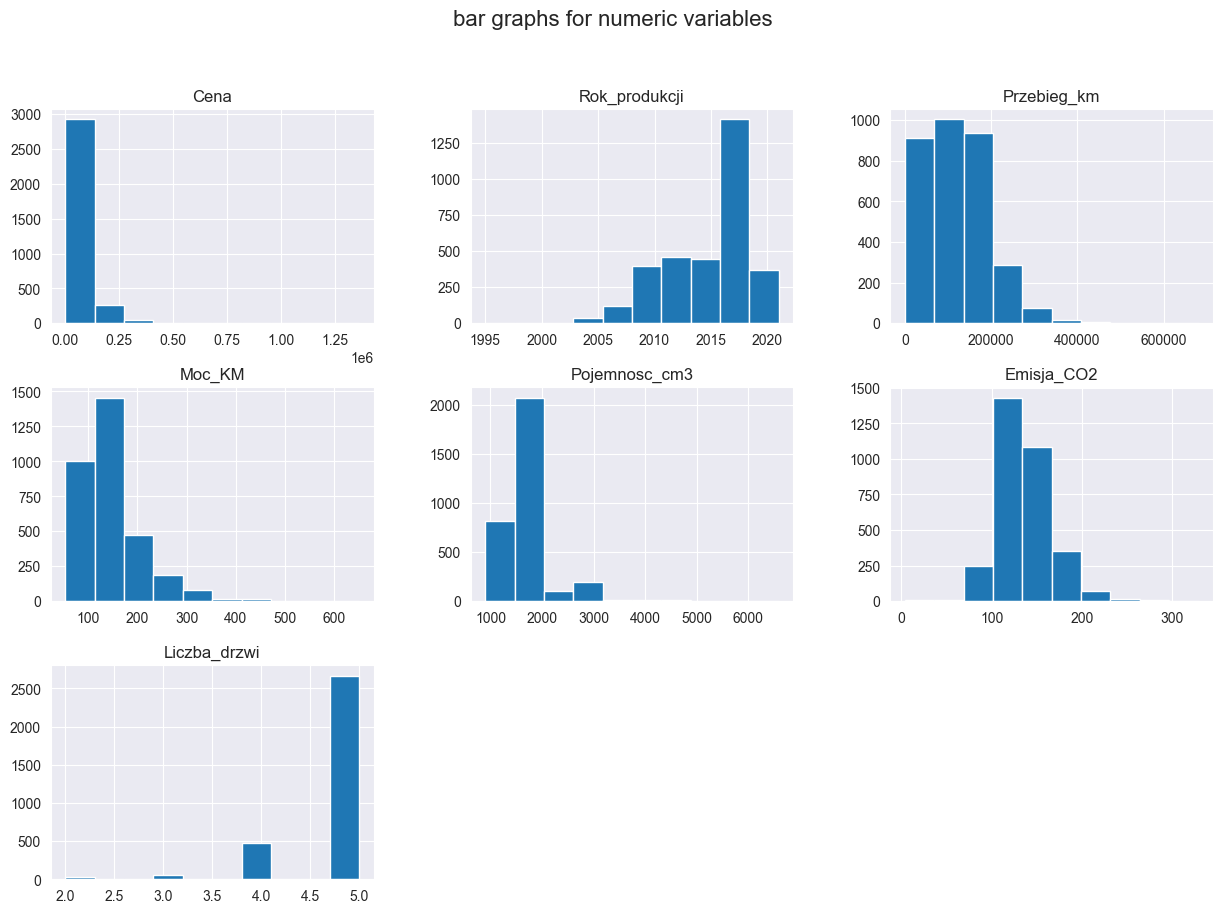

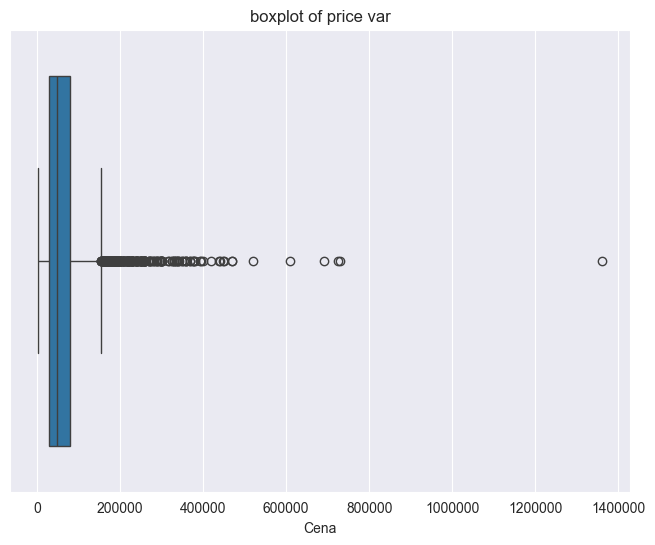

In [5]:
# cleaning missing values 
df = df.dropna()

df.drop('ID', axis=1).hist(figsize=(15, 10))
plt.suptitle("bar graphs for numeric variables", fontsize=16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# boxplot for 'price' outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cena')
plt.title('boxplot of price var')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

['PLN', nan, 'EUR']
Cena_PLN
19900.0     1458
29900.0     1251
16900.0     1183
18900.0     1156
17900.0     1132
            ... 
136899.0       1
98154.0        1
196400.0       1
124850.0       1
160190.0       1
Name: count, Length: 11137, dtype: int64


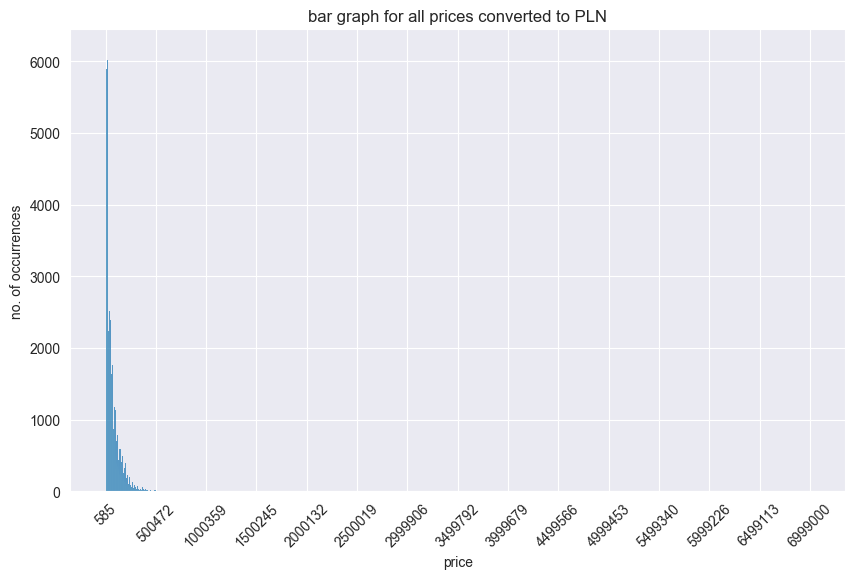

In [245]:
currencies = df['Waluta'].unique().tolist()
print(currencies)

conversion_rates = {'EUR': 4.18, 'PLN': 1.0}
df['Cena_PLN'] = df.apply(lambda row: round(row['Cena'] * conversion_rates.get(row['Waluta'], 1), 0), axis = 1)

print(df['Cena_PLN'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(df['Cena_PLN'])
plt.title('bar graph for all prices converted to PLN')
plt.xlabel('price')
plt.ylabel('no. of occurrences')

min = df['Cena_PLN'].min()
max = df['Cena_PLN'].max()

ticks = np.linspace(min, max, num=15)
plt.xticks(ticks, rotation=45)

plt.ticklabel_format(style='plain', axis='x')

plt.show()


correlation matrix for numeric variables:

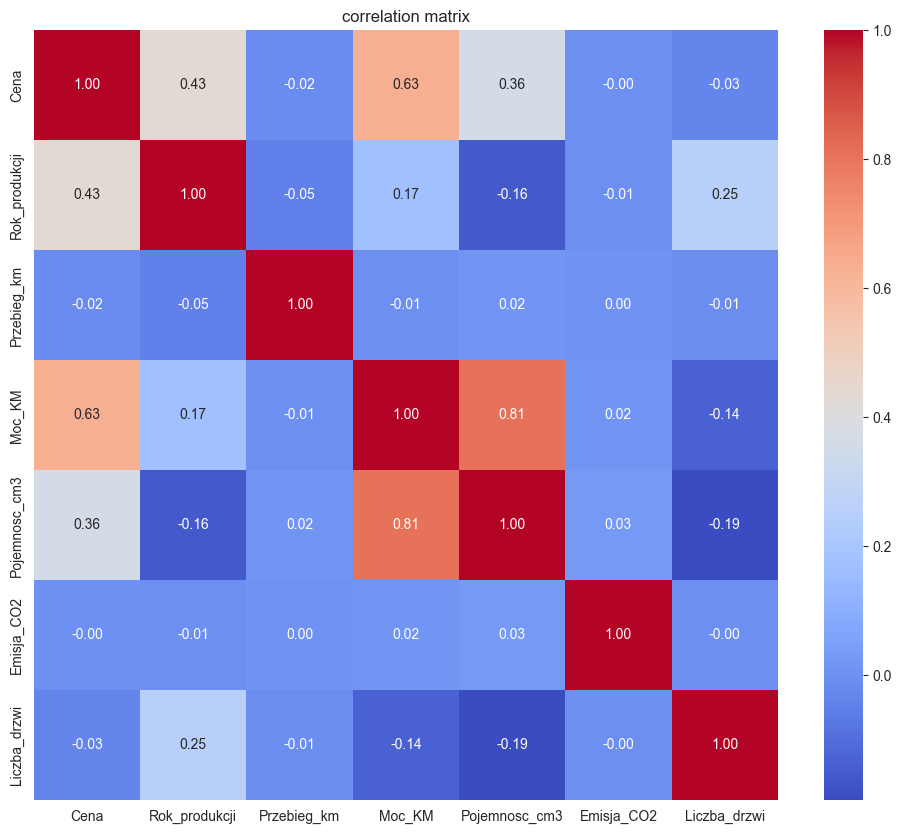

In [137]:
numeric_cols = df.select_dtypes(include=['number']).drop('ID', axis=1)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

ads per date:

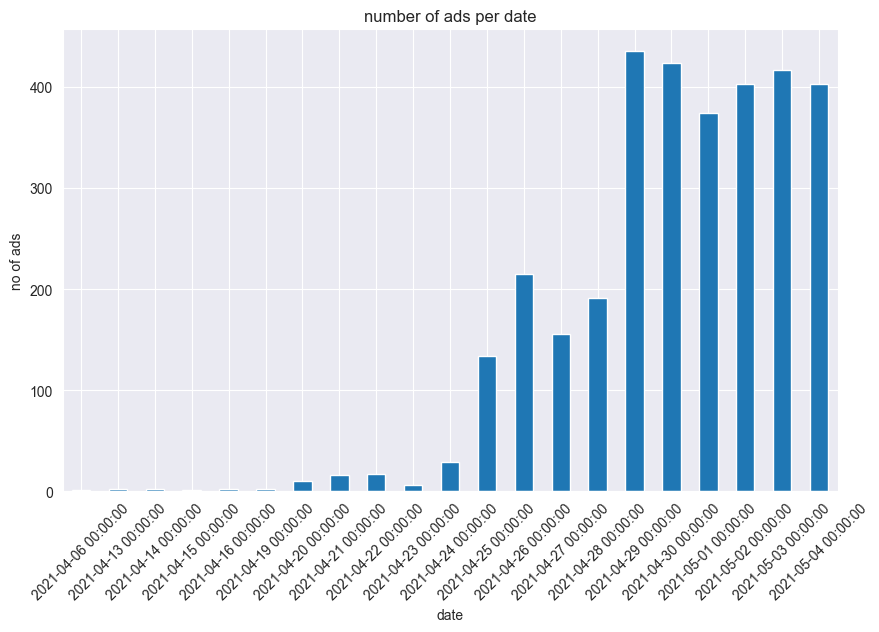

In [10]:
df['Data_pierwszej_rejestracji'] = pd.to_datetime(df['Data_pierwszej_rejestracji'], format="%d/%m/%Y", errors='coerce')
df['Data_publikacji_oferty'] = pd.to_datetime(df['Data_publikacji_oferty'], format="%d/%m/%Y", errors='coerce')

ads_sorted = df['Data_publikacji_oferty'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ads_sorted.plot(kind='bar')
plt.xlabel("date")
plt.ylabel("no of ads")
plt.title("number of ads per date")
plt.xticks(rotation=45)
plt.show()

analysis of correlation between price & other variables:

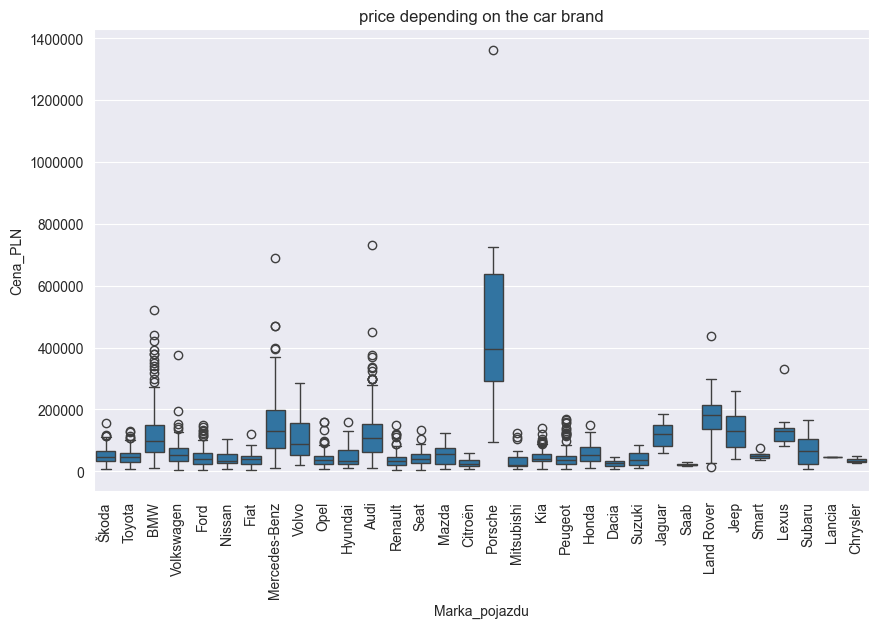

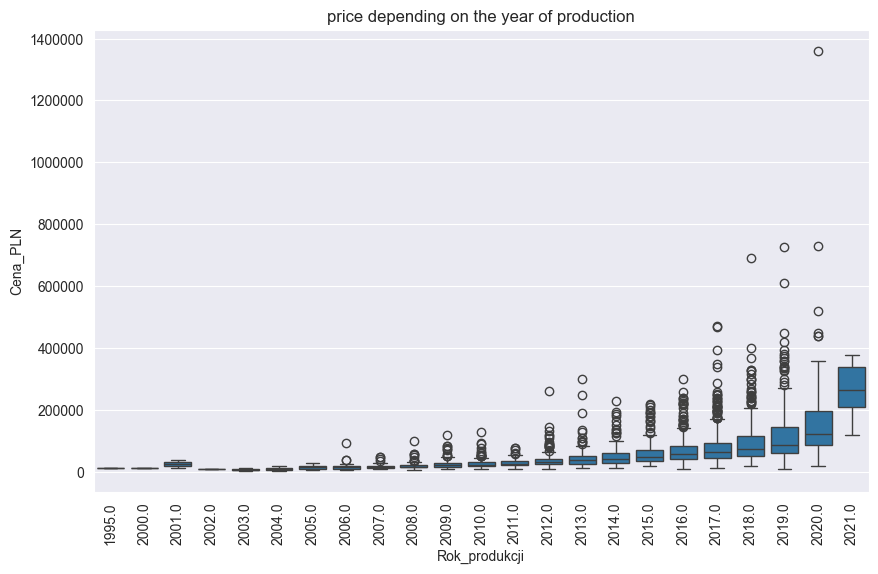

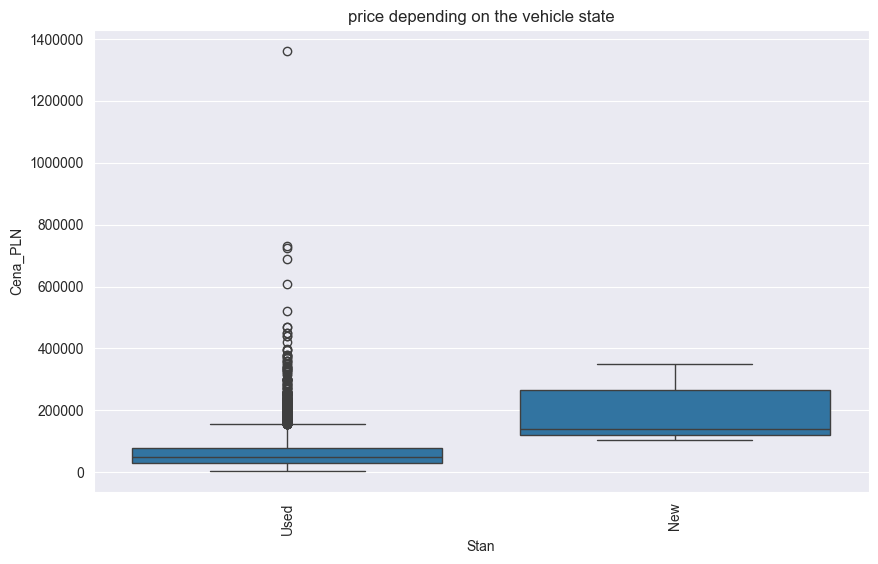

In [11]:
# car brand boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marka_pojazdu', y='Cena_PLN')
plt.title('price depending on the car brand')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


# prod year boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rok_produkcji', y='Cena_PLN')
plt.title('price depending on the year of production')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

# car state boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stan', y='Cena_PLN')
plt.title('price depending on the vehicle state')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


graph for average price by car brand:

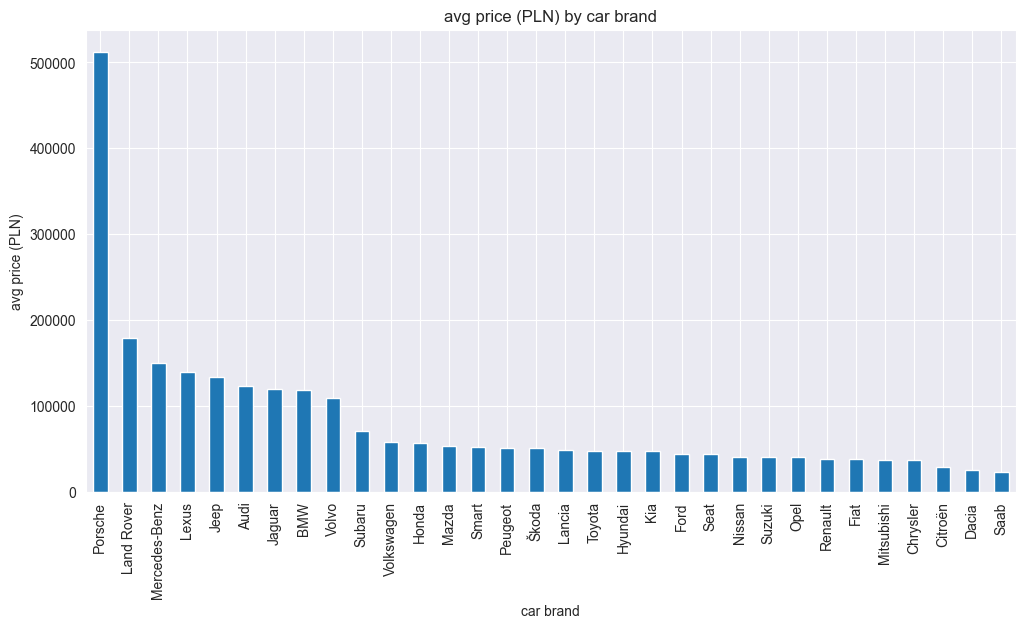

In [14]:
avg_price_by_brand = df.groupby('Marka_pojazdu')['Cena_PLN'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_by_brand.plot(kind='bar')
plt.xlabel("car brand")
plt.ylabel("avg price (PLN)")
plt.title("avg price (PLN) by car brand")
plt.xticks(rotation=90)
plt.show()

number of ads by location:

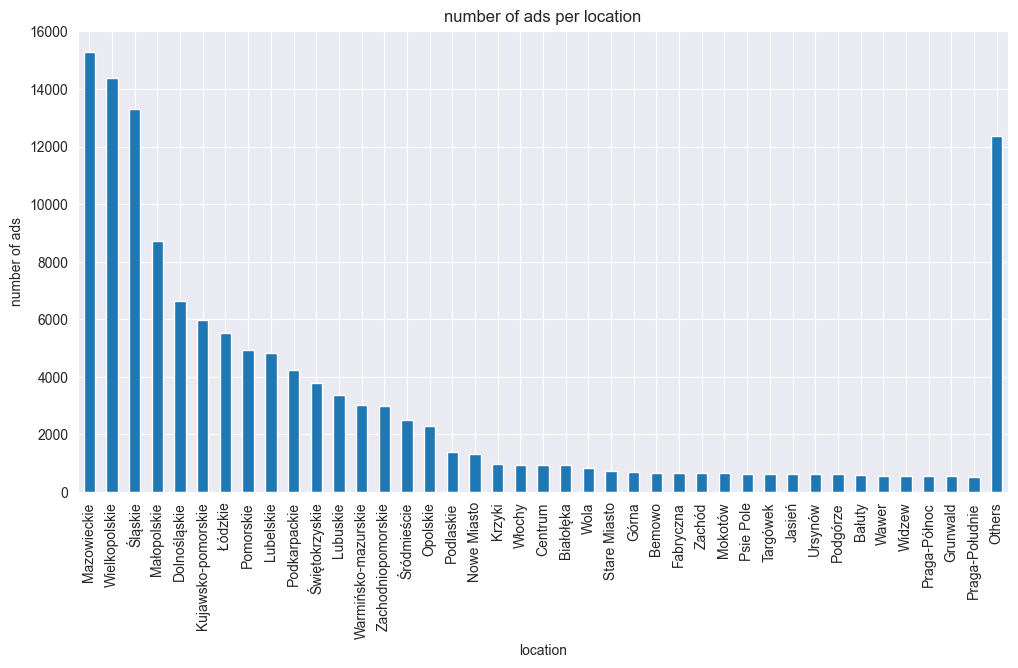

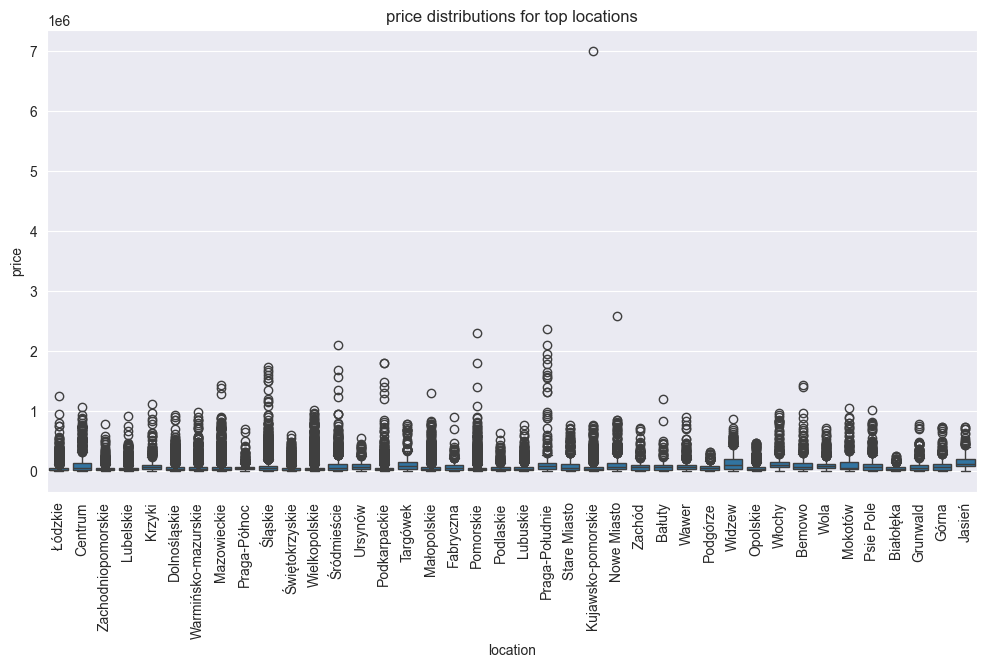

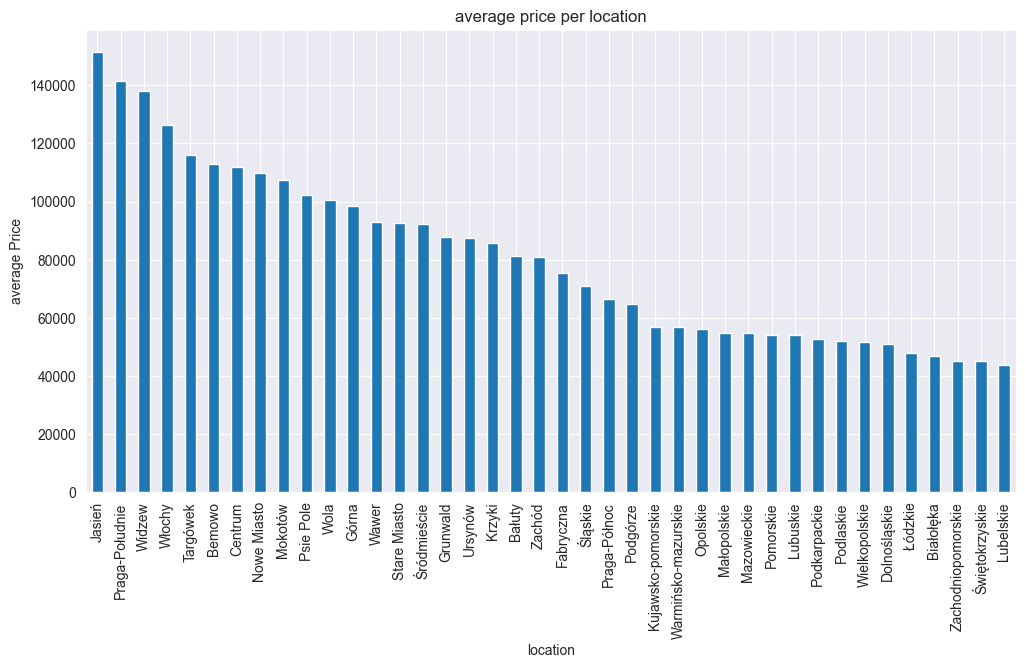

In [232]:
def extract_region_country(location):
    if pd.isnull(location):
        return None
    parts = location.split(',')
    result = parts[-1].strip() if parts else location
    result = result.replace("(Polska)", "").strip()
    return result

df['Region'] = df['Lokalizacja_oferty'].apply(extract_region_country)
ads_by_region = df['Region'].value_counts()

top_no = 40
top = ads_by_region.head(top_no).copy()
others = ads_by_region.iloc[top_no:].sum()
top["Others"] = others

plt.figure(figsize=(12,6))
top.plot(kind='bar')
plt.xlabel('location')
plt.ylabel('number of ads')
plt.title('number of ads per location')
plt.xticks(rotation=90)
plt.show()

# boxplot for price distribution in top locations
df_top = df[df['Region'].isin(top.index)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='Region', y='Cena')
plt.title("price distributions for top locations")
plt.xlabel("location")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.show()

# avg price per location
avg_prices = df_top.groupby('Region')['Cena'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_prices.plot(kind='bar')
plt.title("average price per location")
plt.xlabel("location")
plt.ylabel("average Price")
plt.xticks(rotation=90)
plt.show()


creating and saving number of ads per location as a map:

In [124]:
import folium
from geopy.geocoders import Nominatim
import time
import ssl
import certifi

context = ssl.create_default_context(cafile=certifi.where())
geolocator = Nominatim(user_agent="xyz (s27162@pjwstk.edu.pl)", ssl_context=context)


map_center = [52.237049, 21.017532]
m = folium.Map(location=map_center, zoom_start=6)

for region, count in ads_by_region.items():
    query = f"{region}, Polska"
    try:
        location = geolocator.geocode(query, timeout=10)
    except Exception as e:
        print(f"error while geocoding {region}: {e}")
        location = None
    if location:
        lat, lon = location.latitude, location.longitude
        radius = 5 + count / 50
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=f"{region}: {count} ads",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)
    else:
        print("no geocoding found for:", region)
    time.sleep(1) 
    
m.save("../reports/ads_map.html")


no geocoding found for: Chełm z dzielnicą Gdańsk Południe
no geocoding found for: Koźle-Zachód
no geocoding found for: Załęska Hałda-Brynów cz. Zach.
no geocoding found for: Stogi z Przeróbką


show map:

In [125]:
m

Let's now examine equipment frequency:

In [148]:
df['Wyposazenie'].value_counts()

Wyposazenie
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   11717
['Automatic air conditioning']                                                                                   

In [233]:
import ast
df['Wyposazenie'] = df['Wyposazenie'].fillna('[]')
df['Wyposazenie_list'] = df['Wyposazenie'].apply(ast.literal_eval)

unique_values = set(item for sublist in df['Wyposazenie_list'] for item in sublist)

print("Unique Equipment Options:")
print(unique_values)

Unique Equipment Options:
{'Cruise control', 'Bluetooth', 'Lane assistant', 'Fog lights', 'Rain sensor', 'Active cruise control', 'Speed limiter', 'Passengers airbag', 'ESP(stabilization of the track)', 'Front parking sensors', 'GPS navigation', 'Electrochromic side mirrors', 'SD socket', 'Rear side airbags', 'Panoramic roof', 'AUX socket', 'Isofix', 'CD changer', 'Shift paddles', 'Alloy wheels', 'Electric front windows', 'ABS', 'Blind spot sensor', 'Manual air conditioning', 'Front side airbags', 'Heated rear seats', 'TV tuner', 'Heated front seats', 'Immobilizer', 'Parking assistant', 'Factory radio', 'MP3', 'HUD(head-up display)', 'Auxiliary heating', 'Hook', 'Velor upholstery', 'Heated windscreen', 'Electrically adjustable seats', 'Aftermarket radio', 'Electrochromic rear view mirror', 'CD', 'Power steering', 'LED lights', 'DVD player', 'USB socket', 'Four-zone air conditioning', 'Automatic air conditioning', 'Tinted windows', 'Xenon lights', 'Start-Stop system', 'Drivers airbag', 

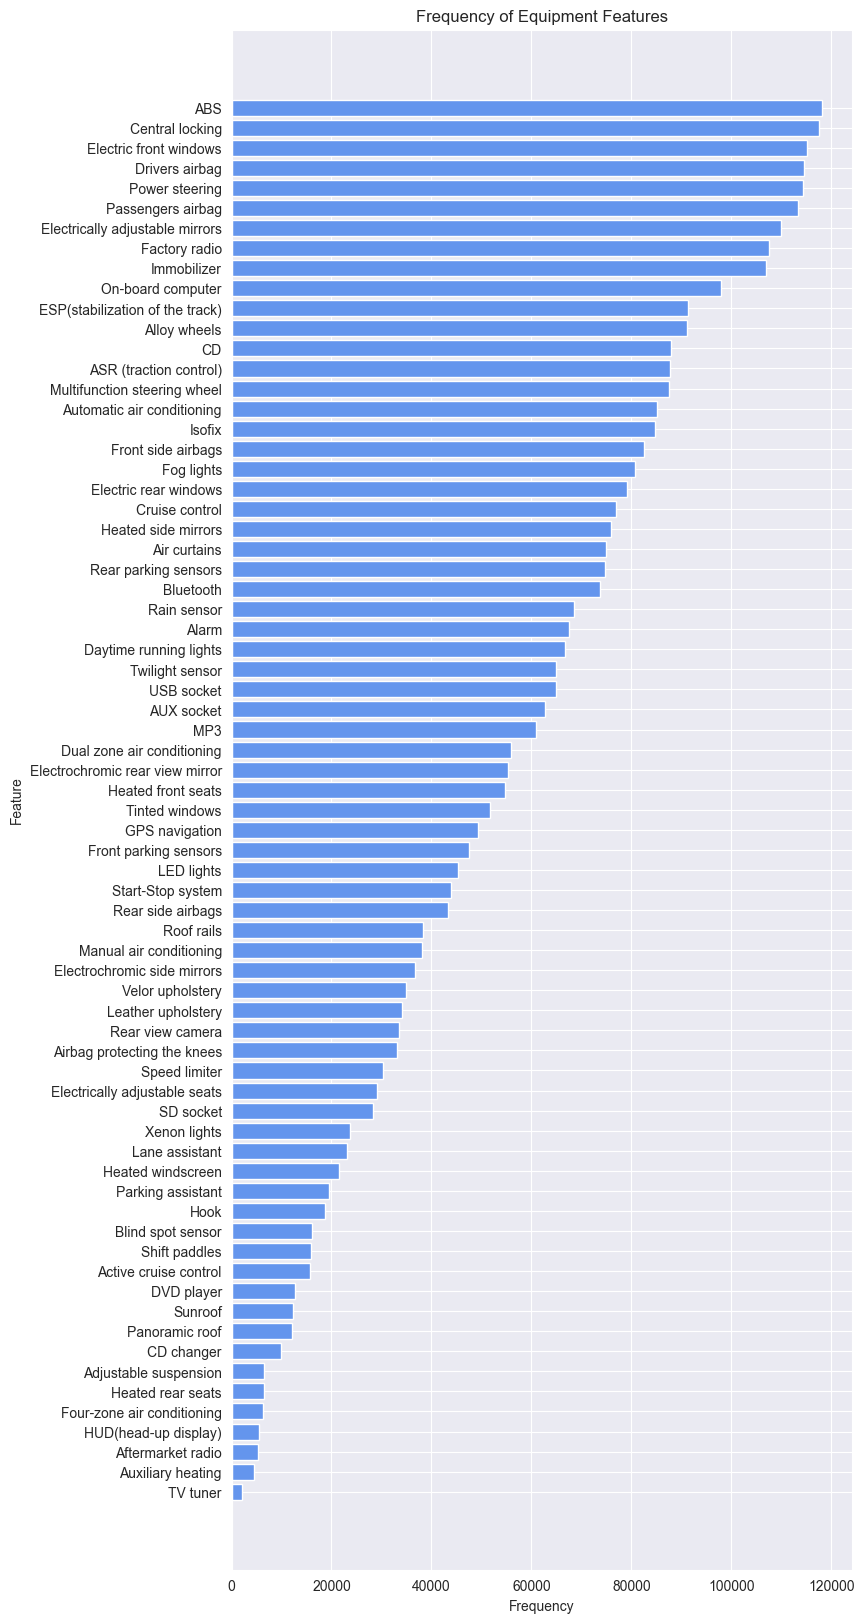

In [149]:
from collections import Counter

equipment_counts = Counter(item for sublist in df['Wyposazenie_list'] for item in sublist)

equipment_df = pd.DataFrame(equipment_counts.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 20))
plt.barh(equipment_df['Feature'], equipment_df['Count'], color='cornflowerblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Frequency of Equipment Features')
plt.gca().invert_yaxis()  
plt.show()

In [150]:
equipment_df['Percentage'] = equipment_df['Count'] / len(df) * 100
equipment_df

,Feature,Count,Percentage
0,ABS,118133,87.249348
12,Central locking,117470,86.759677
1,Electric front windows,115037,84.962739
2,Drivers airbag,114554,84.606010
3,Power steering,114405,84.495964
...,...,...,...
59,Four-zone air conditioning,6284,4.641166
57,HUD(head-up display),5482,4.048834
66,Aftermarket radio,5283,3.901859
63,Auxiliary heating,4589,3.389292


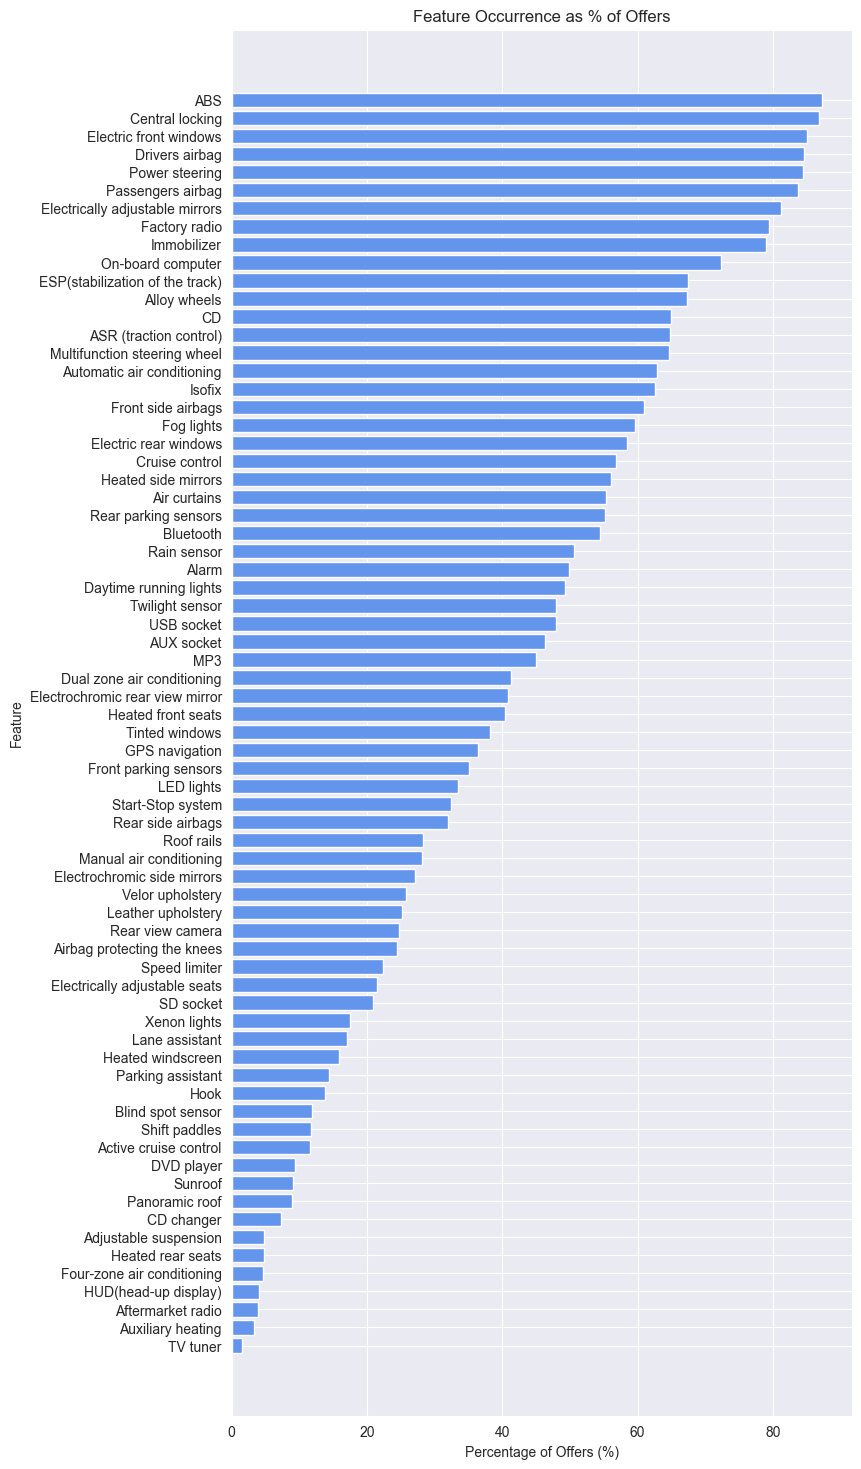

In [151]:
equipment_df = equipment_df.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(8, 18))
plt.barh(equipment_df['Feature'], equipment_df['Percentage'], color='cornflowerblue')
plt.xlabel('Percentage of Offers (%)')
plt.ylabel('Feature')
plt.title('Feature Occurrence as % of Offers')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common on top
plt.show()

There are some features that are common to almost all cars (ex.ABS, Central Locking, Airbac)

Let's define set of basic and rare features. To do this, let's first check the distribution of the price per each feature.

count    4.216700e+04
mean     8.214591e+04
std      1.067457e+05
min      7.990000e+02
25%      2.290000e+04
50%      4.698600e+04
75%      9.900000e+04
max      2.370000e+06
Name: Cena_PLN, dtype: float64


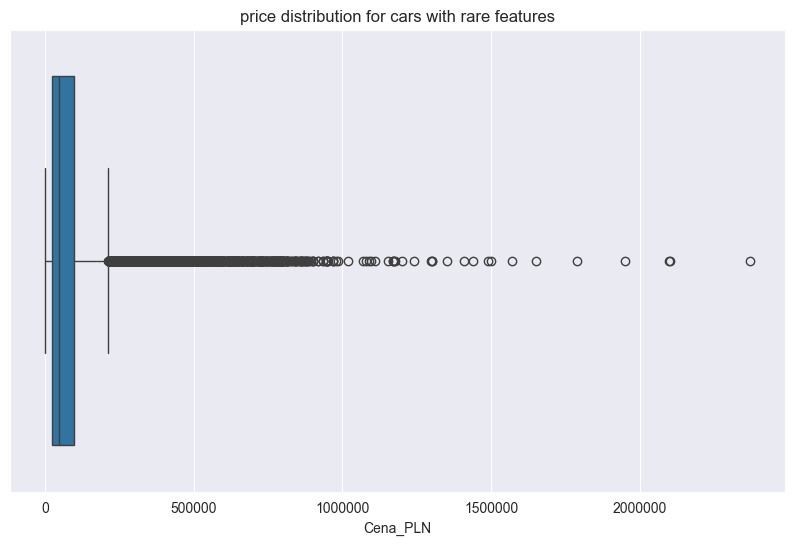

count     93230.000000
mean      54777.748504
std       80348.430864
min         585.000000
25%       15999.000000
50%       31500.000000
75%       67500.000000
max     6999000.000000
Name: Cena_PLN, dtype: float64


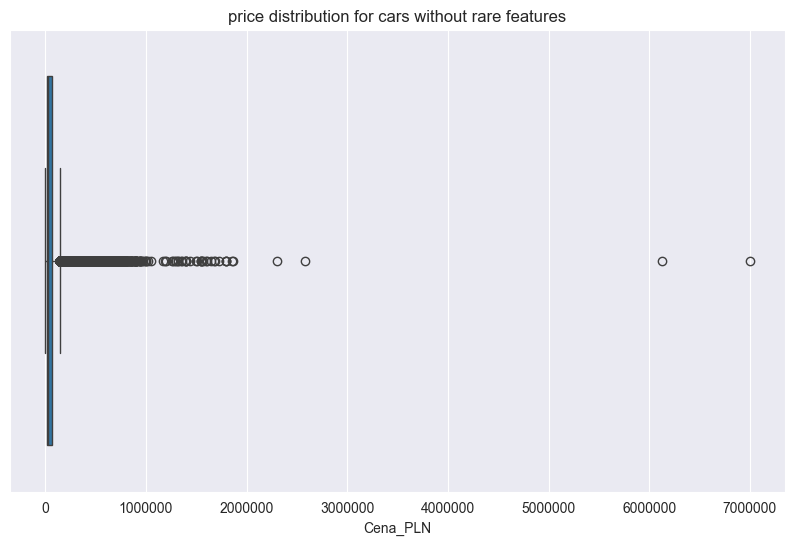

In [154]:
rare_features = equipment_df[equipment_df['Percentage'] < 10].Feature.to_list()

#price range for cars that have at least one rare feature
df_rare = df[df['Wyposazenie_list'].apply(lambda x: any(item in x for item in rare_features))]
print(df_rare['Cena_PLN'].describe())
# boxplot for price distribution in cars with rare features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rare, x='Cena_PLN')
plt.title('price distribution for cars with rare features')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#price range for cars that don't have any rare feature
df_common = df[~df['Wyposazenie_list'].apply(lambda x: any(item in x for item in rare_features))]
with pd.option_context('display.float_format', '{:.6f}'.format):
    print(df_common['Cena_PLN'].describe())
    
# boxplot for price distribution in cars without rare features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_common, x='Cena_PLN')
plt.title('price distribution for cars without rare features')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We can see that cars with rare features are on average more expensive than cars without them. There are some outliers in both cases. I.e. very expensive cars without rare features. However, the minimum price for cars with rare features is higher than the min price for cars without them.

In [155]:
all_features = equipment_df.Feature.to_list()

In [156]:
# print min price of a car for each feature
min_max_price_per_feature = []
for feature in all_features:
    print(feature)
    df_feature = df[df['Wyposazenie_list'].apply(lambda x: feature in x)]
    min_price = df_feature['Cena_PLN'].min()
    max_price = df_feature['Cena_PLN'].max()
    min_max_price_per_feature.append({"feature": feature, "min_price": min_price, "max_price": max_price})

ABS
Central locking
Electric front windows
Drivers airbag
Power steering
Passengers airbag
Electrically adjustable mirrors
Factory radio
Immobilizer
On-board computer
ESP(stabilization of the track)
Alloy wheels
CD
ASR (traction control)
Multifunction steering wheel
Automatic air conditioning
Isofix
Front side airbags
Fog lights
Electric rear windows
Cruise control
Heated side mirrors
Air curtains
Rear parking sensors
Bluetooth
Rain sensor
Alarm
Daytime running lights
Twilight sensor
USB socket
AUX socket
MP3
Dual zone air conditioning
Electrochromic rear view mirror
Heated front seats
Tinted windows
GPS navigation
Front parking sensors
LED lights
Start-Stop system
Rear side airbags
Roof rails
Manual air conditioning
Electrochromic side mirrors
Velor upholstery
Leather upholstery
Rear view camera
Airbag protecting the knees
Speed limiter
Electrically adjustable seats
SD socket
Xenon lights
Lane assistant
Heated windscreen
Parking assistant
Hook
Blind spot sensor
Shift paddles
Active cr

In [157]:
min_max_price_per_ft_df = pd.DataFrame(min_max_price_per_feature)
min_max_price_per_ft_df

,feature,min_price,max_price
0,ABS,585.0,6999000.0
1,Central locking,585.0,6999000.0
2,Electric front windows,585.0,6999000.0
3,Drivers airbag,585.0,6999000.0
4,Power steering,585.0,6999000.0
...,...,...,...
65,Four-zone air conditioning,2199.0,2370000.0
66,HUD(head-up display),2500.0,2370000.0
67,Aftermarket radio,900.0,968000.0
68,Auxiliary heating,1975.0,1500000.0


In [158]:
min_max_price_per_ft_df.max_price.describe()

count    7.000000e+01
mean     4.350682e+06
std      2.539716e+06
min      9.680000e+05
25%      2.101970e+06
50%      2.370000e+06
75%      6.999000e+06
max      6.999000e+06
Name: max_price, dtype: float64

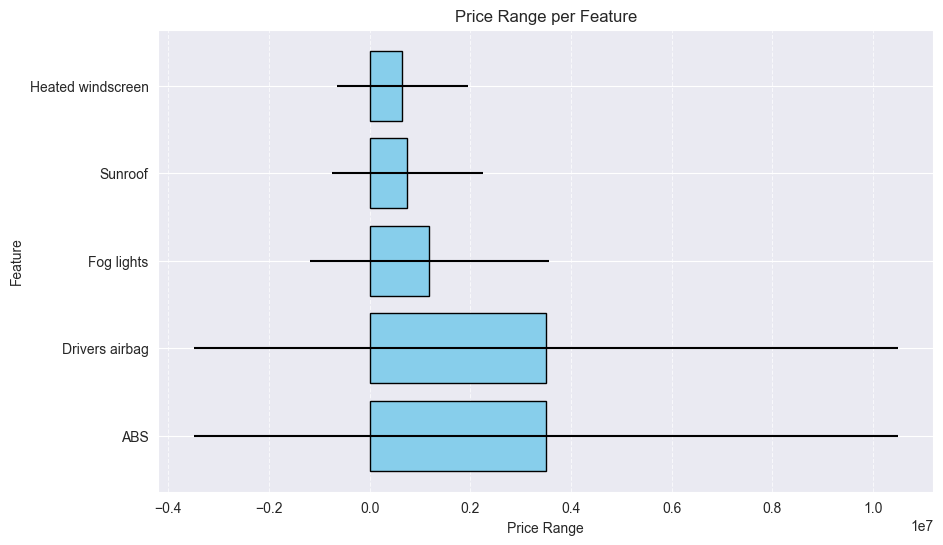

In [254]:
min_max_price_per_ft_df['MeanPrice'] = (min_max_price_per_ft_df['min_price'] + min_max_price_per_ft_df['max_price']) / 2
min_max_price_per_ft_df['Error'] = min_max_price_per_ft_df['max_price'] - min_max_price_per_ft_df['min_price']
min_max_price_per_ft_df = min_max_price_per_ft_df.sort_values('MeanPrice', ascending=False)

sub_fts = min_max_price_per_ft_df[min_max_price_per_ft_df['feature'].isin(["Heated windscreen", "Sunroof", "Fog lights", "ABS", "Drivers airbag"])]
plt.figure(figsize=(10, 6))
plt.barh(sub_fts['feature'], sub_fts['MeanPrice'], xerr=sub_fts['Error'], color='skyblue', edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Feature')
plt.title('Price Range per Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [166]:
min_max_price_per_ft_df.feature.tail(11).tolist(
    
)

['Velor upholstery',
 'Xenon lights',
 'Auxiliary heating',
 'Airbag protecting the knees',
 'Sunroof',
 'Hook',
 'CD changer',
 'SD socket',
 'Heated windscreen',
 'Manual air conditioning',
 'Aftermarket radio']

Here we can see a list of features that are typically associated with higher prices. These features are usually found in more expensive cars. Those are features where price range is the lowest.

Let's check if the number of features in a car influences car price.

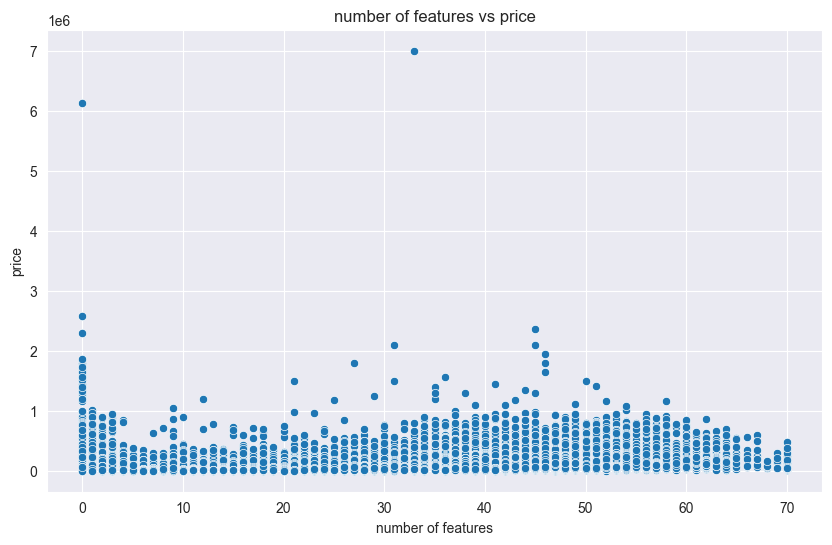

In [255]:
df["Wyposazenie_list_len"] = df["Wyposazenie_list"].apply(len)
df["Rare_wyposazenie_list_len"] = df["Wyposazenie_list"].apply(lambda x: len([item for item in x if item in rare_features]))
# plot scatter number of features vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wyposazenie_list_len', y='Cena_PLN')
plt.title('number of features vs price')
plt.xlabel('number of features')
plt.ylabel('price')
plt.show()


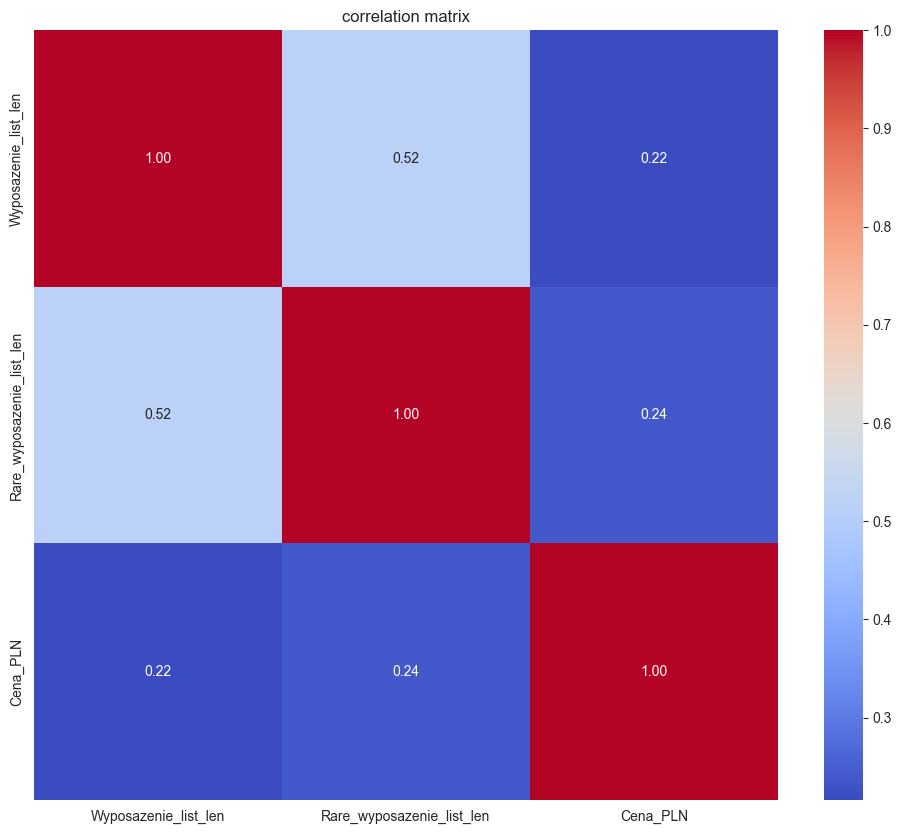

In [259]:
corr_wyposazenie = df[['Wyposazenie_list_len', 'Rare_wyposazenie_list_len', 'Cena_PLN']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_wyposazenie, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()
# print(f"correlation between number of features and price: {corr} is weak")

It is not important how many features a car has, but which features it has. The number of features does not correlate with the price.

Let's check the correctness of location column

In [246]:
poland_voivodeships = [
    'dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie', 'łódzkie', 'małopolskie', 'mazowieckie',
    'opolskie', 'podkarpackie', 'podlaskie', 'pomorskie', 'śląskie', 'świętokrzyskie', 'warmińsko-mazurskie',
    'wielkopolskie', 'zachodniopomorskie'
]
location_to_voivodeship = {
    "Warszawa": "mazowieckie",
    "Kraków": "małopolskie",
    "Wrocław": "dolnośląskie",
    "Poznań": "wielkopolskie",
    "Gdańsk": "pomorskie",
    "Sopot": "pomorskie",
    "Szczecin": "zachodniopomorskie",
    "Białystok": "podlaskie",
    "Bydgoszcz": "kujawsko-pomorskie",
    "Częstochowa": "śląskie",
    "Łódź": "łódzkie",
    "Gliwice": "śląskie",
    "Katowice": "śląskie",
    "Bieruń": "śląskie",
    "Bielsko-Biała": "śląskie",
    "Imielin": "śląskie",
    "Gdynia": "pomorskie",
    "Będzin": "śląskie",
    "Zawiercie": "śląskie",
    "Mikołów": "śląskie",
    "Orzesze": "śląskie",
    "Józefów": "mazowieckie",
    
}

def assign_voivodeship(location):
    if pd.isnull(location):
        return "inne"
    for voivodeship in poland_voivodeships:
        if voivodeship in location.lower():
            return voivodeship
    for key, value in location_to_voivodeship.items():
        if key.lower() in location.lower():
            return value
    
    return "inne"

# if voivodeship in location name, extract it
df['Wojewodztwo'] = df['Lokalizacja_oferty'].apply(lambda x: assign_voivodeship(x))
df["Wojewodztwo"].value_counts()

Wojewodztwo
mazowieckie            24165
śląskie                18013
opolskie               17878
małopolskie            11785
pomorskie              11759
dolnośląskie            9696
łódzkie                 8120
kujawsko-pomorskie      5985
lubelskie               4840
podkarpackie            4225
świętokrzyskie          3771
inne                    3673
lubuskie                3387
warmińsko-mazurskie     3017
podlaskie               2759
wielkopolskie           1437
zachodniopomorskie       887
Name: count, dtype: int64

<Axes: xlabel='Wojewodztwo'>

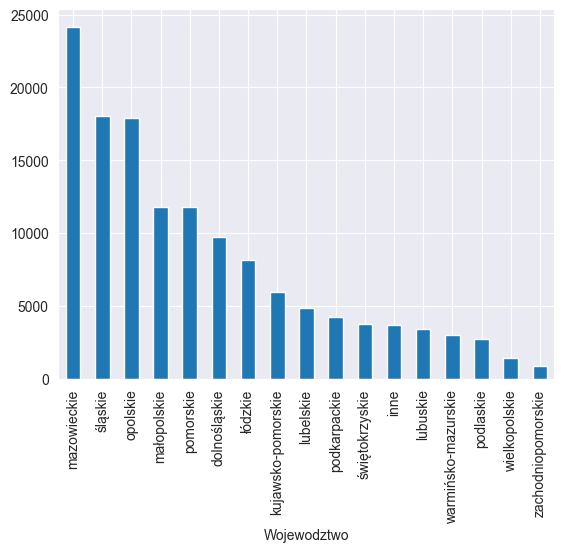

In [249]:
df["Wojewodztwo"].value_counts().plot(kind='bar')

In [247]:
df[df["Wojewodztwo"].isnull()]["Lokalizacja_oferty"]

Series([], Name: Lokalizacja_oferty, dtype: object)

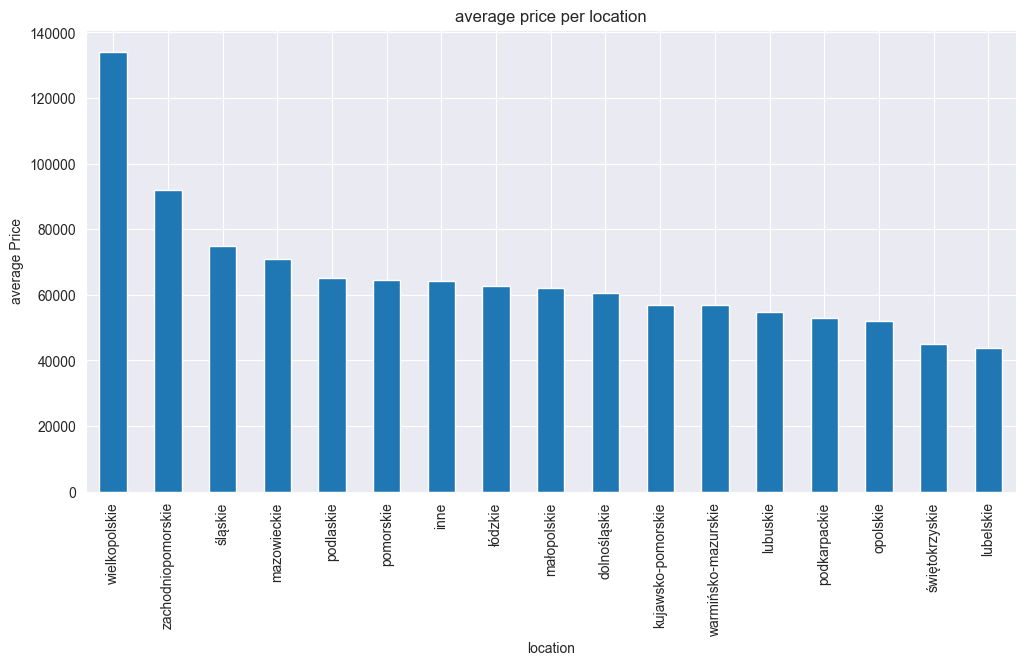

In [248]:
avg_prices = df.groupby('Wojewodztwo')['Cena_PLN'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_prices.plot(kind='bar')
plt.title("average price per location")
plt.xlabel("location")
plt.ylabel("average Price")
plt.xticks(rotation=90)
plt.show()

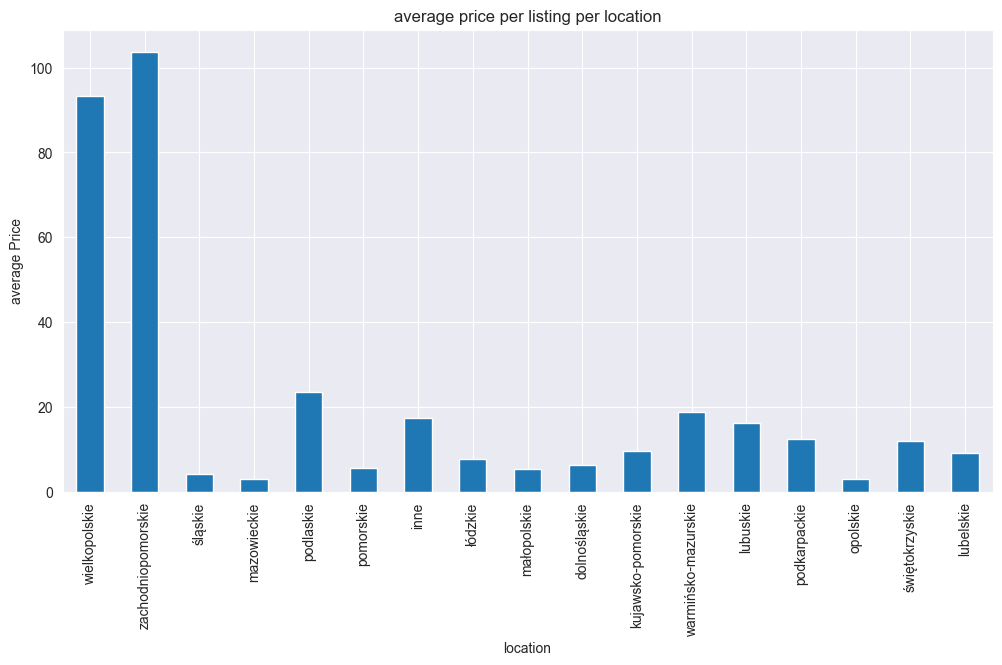

In [265]:
avg_prices_per_listing = df.groupby('Wojewodztwo')['Cena_PLN'].mean().sort_values(ascending=False)
avg_prices_per_listing /= df['Wojewodztwo'].value_counts()
plt.figure(figsize=(12,6))
avg_prices_per_listing.plot(kind='bar')
plt.title("average price per listing per location")
plt.xlabel("location")
plt.ylabel("average Price")
plt.xticks(rotation=90)
plt.show()


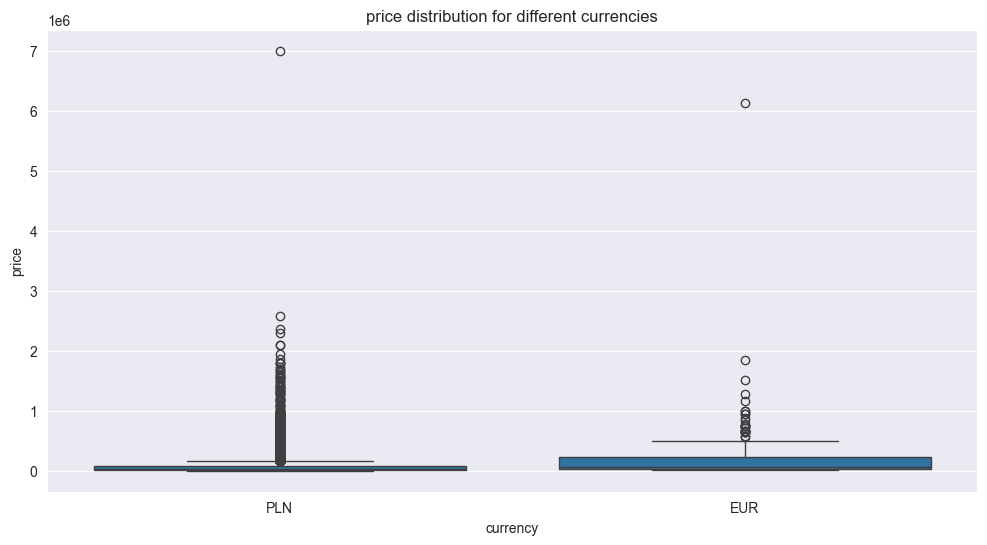

In [165]:
# boxplots for Waluta EUR PLN nan
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Waluta', y='Cena_PLN')
plt.title('price distribution for different currencies')
plt.xlabel('currency') 
plt.ylabel('price')
plt.show()

Fill rok produkcji based on other features

In [169]:
df["Rok_produkcji"].isna().sum()
df[df["Rok_produkcji"].isna()]

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,Wyposazenie_list,Cena_PLN,Wyposazenie_list_len
24,25,99000,PLN,Used,Daewoo,Chairman,NaN,NaN,NaN,182.0,...,black,NaN,Yes,NaN,01/05/2021,"Mickiewicza 23- OKOLICE - 35-233 Rzeszów, Podk...","['ABS', 'Electric front windows', 'Drivers air...","[ABS, Electric front windows, Drivers airbag, ...",99000.0,32
50,51,201600,PLN,Used,Jeep,Grand Cherokee,Gr 3.0 CRD Overland,IV (2010-),NaN,85000.0,...,black,Germany,Yes,01/10/2019,26/04/2021,"ul. Brzozowa 8 - 11-030 Trękusek, olsztyński, ...","['ABS', 'Electric front windows', 'Drivers air...","[ABS, Electric front windows, Drivers airbag, ...",201600.0,64
60,61,119999,PLN,Used,Porsche,911,Carrera 4,996 (1997-2004),NaN,86854.0,...,silver,NaN,NaN,NaN,03/05/2021,"Gostyńska 48 - 63-100 Śrem, śremski, Wielkopol...","['ABS', 'Electric front windows', 'Drivers air...","[ABS, Electric front windows, Drivers airbag, ...",119999.0,13
118,119,37900,PLN,Used,Ford,Focus,NaN,Mk3 (2010-),NaN,160000.0,...,black,Poland,Yes,NaN,27/04/2021,"ul.Jeleniogórska 40B - 58-400 Kamienna Góra, k...","['ABS', 'Rain sensor', 'Electric front windows...","[ABS, Rain sensor, Electric front windows, ASR...",37900.0,30
173,174,14800,PLN,Used,Chevrolet,Aveo,1.3,NaN,NaN,187000.0,...,silver,NaN,Yes,NaN,04/05/2021,"MICKIEWICZA 21A - 32-566 Alwernia, chrzanowski...","['ABS', 'Central locking', 'Electric rear wind...","[ABS, Central locking, Electric rear windows, ...",14800.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135065,135066,48000,PLN,Used,Citroën,Berlingo,1.6 BlueHDi XTR S&S,II (2008-2018),NaN,114102.0,...,gray,NaN,Yes,05/04/2018,30/04/2021,"Andre Citroena 1 - 70-772 Szczecin, Prawobrzeż...","['ABS', 'Electric front windows', 'Drivers air...","[ABS, Electric front windows, Drivers airbag, ...",48000.0,26
135073,135074,19900,PLN,Used,Opel,Antara,2.0 CDTI Cosmo,NaN,NaN,298000.0,...,black,NaN,NaN,NaN,28/04/2021,"Bądków, grójecki, Mazowieckie","['ABS', 'Electric front windows', 'Passengers ...","[ABS, Electric front windows, Passengers airba...",19900.0,23
135241,135242,58500,PLN,Used,Toyota,Yaris,NaN,III (2011-),NaN,19000.0,...,white,Poland,Yes,12/09/2017,02/05/2021,"ŁÓDZKA 73 - 95-050 Konstantynów Łódzki, pabian...","['ABS', 'Central locking', 'Electric rear wind...","[ABS, Central locking, Electric rear windows, ...",58500.0,19
135305,135306,86900,PLN,Used,BMW,Seria 3,NaN,F30/F31 (2012-),NaN,NaN,...,black,Poland,Yes,NaN,29/04/2021,"Jawornik 90 - 32-400 Jawornik, myślenicki, Mał...","['ABS', 'Central locking', 'ASR (traction cont...","[ABS, Central locking, ASR (traction control),...",86900.0,27


In [170]:
df[df["Waluta"].isna()][["Kraj_pochodzenia", "Lokalizacja_oferty"]]

,Kraj_pochodzenia,Lokalizacja_oferty
10,Poland,"ul. Radzymińska 78 - 03-752 Warszawa, Praga-Pó..."
72,Poland,"Tarnów, Małopolskie"
128,NaN,"Widok, grójecki, Mazowieckie"
171,NaN,"osiedle Bajkowe 52 - 62-200 Gniezno, gnieźnień..."
205,Netherlands,"Pieńsk, zgorzelecki, Dolnośląskie"
...,...,...
135089,Germany,"Ostrów Mazowiecka, ostrowski, Mazowieckie"
135185,NaN,"TORUŃSKA 169 - 87-800 Włocławek, Kujawsko-pomo..."
135262,NaN,"Bydgoszcz, Kujawsko-pomorskie"
135316,NaN,"Lublin, Lubelskie"


Let's now look for incorrect values in the dataset

<Axes: >

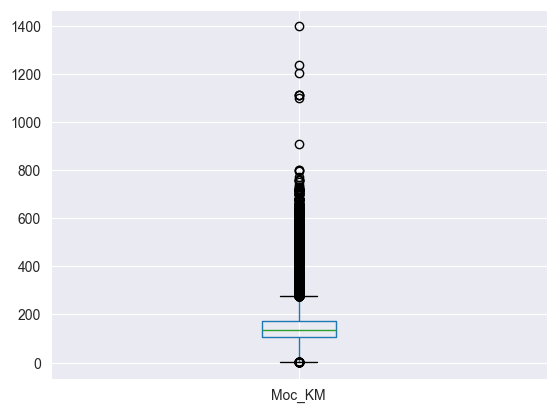

In [180]:
df.boxplot(["Moc_KM"])

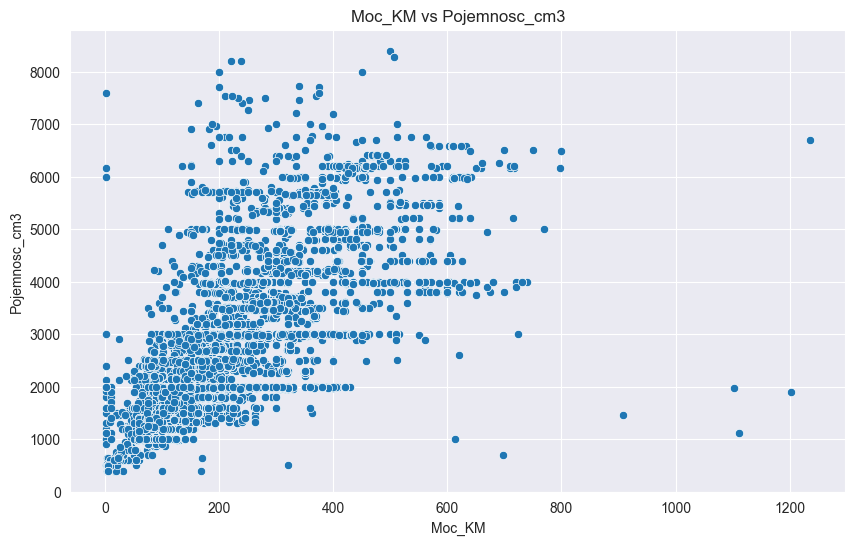

In [182]:
# visualizing the relationship between Moc_KM and Pojemnosc_cm3
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Moc_KM', y='Pojemnosc_cm3')
plt.title('Moc_KM vs Pojemnosc_cm3')
plt.xlabel('Moc_KM')
plt.ylabel('Pojemnosc_cm3')
plt.show()

Naturally Aspirated Engines (without a turbocharger):
➤ Typically produce 60-100 KM per liter (1000 cm³).
Example: A 2000 cm³ (2.0L) engine usually has 120-200 KM.

Turbocharged/Performance Engines:
➤ Produce 100-200 KM per liter (1000 cm³) or more.
Example: A 2000 cm³ (2.0L) turbo engine can have 200-400 KM.

Found 933 outliers


<Axes: xlabel='KM_per_L', ylabel='Count'>

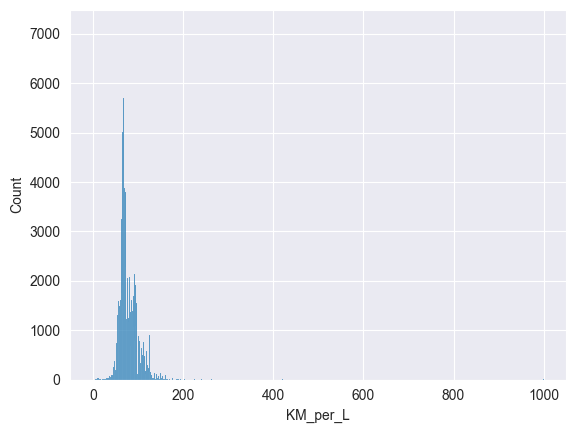

In [187]:
df["KM_per_L"] = df["Moc_KM"] / (df["Pojemnosc_cm3"] / 1000)
outliers = df[(df["KM_per_L"] < 40) | (df["KM_per_L"] > 200)]
print(f"Found {len(outliers)} outliers")
sns.histplot(df["KM_per_L"])

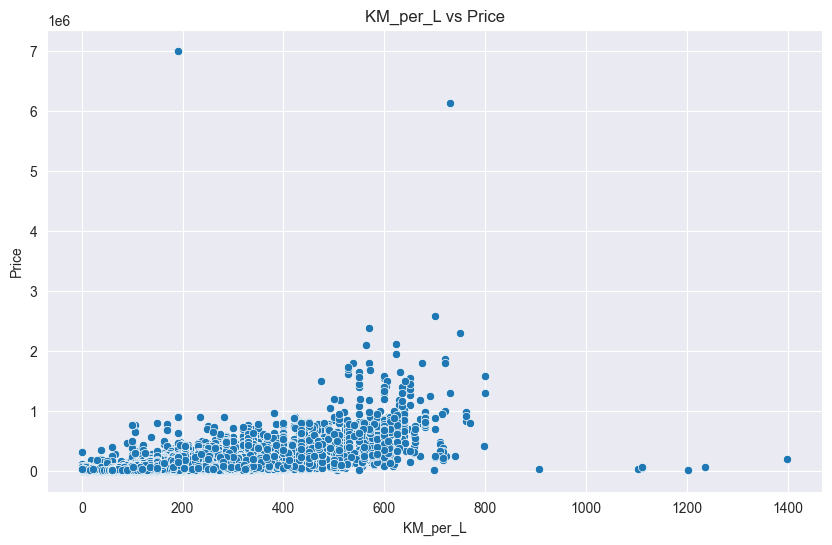

In [193]:
# visualize the relationship between KM_per_L and price and Pojemnosc_cm3 and Moc_KM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='KM_per_L', y='Cena_PLN')
plt.title('KM_per_L vs Price')
plt.xlabel('KM_per_L')
plt.ylabel('Price')
plt.show()


Let's now check if Przebieg is correct by comparing it with Rok_produkcji and Stan

2005.0
Przebieg_km
240000.0    57
220000.0    50
230000.0    48
250000.0    47
200000.0    38
            ..
351200.0     1
258677.0     1
103500.0     1
200343.0     1
256769.0     1
Name: count, Length: 1872, dtype: int64


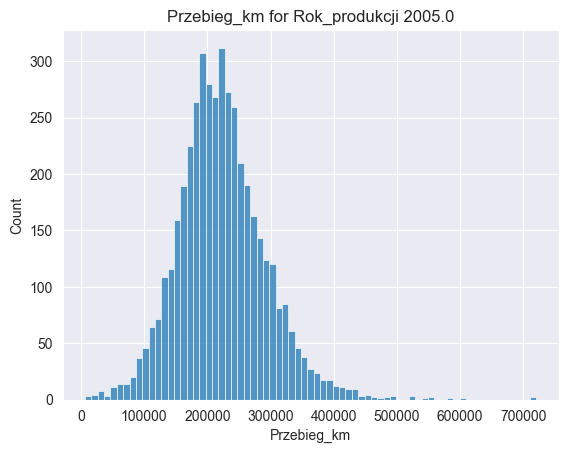

2010.0
Przebieg_km
200000.0    64
180000.0    62
230000.0    56
190000.0    55
220000.0    54
            ..
84651.0      1
218750.0     1
92086.0      1
95948.0      1
119891.0     1
Name: count, Length: 2602, dtype: int64


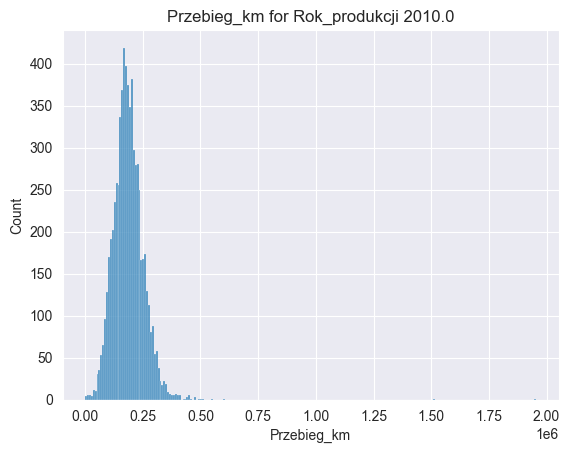

2015.0
Przebieg_km
120000.0    46
180000.0    45
150000.0    44
140000.0    43
170000.0    36
            ..
22676.0      1
123690.0     1
185342.0     1
29822.0      1
90623.0      1
Name: count, Length: 2827, dtype: int64


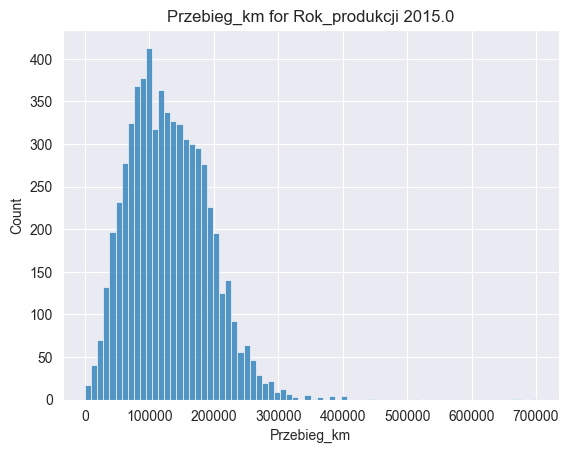

2007.0
Przebieg_km
220000.0    65
240000.0    63
230000.0    57
200000.0    56
260000.0    56
            ..
292500.0     1
142769.0     1
219751.0     1
195786.0     1
281100.0     1
Name: count, Length: 2514, dtype: int64


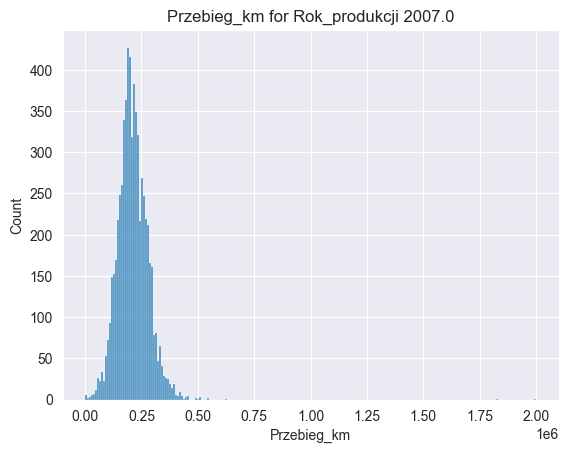

2013.0
Przebieg_km
150000.0    48
160000.0    47
190000.0    46
140000.0    46
180000.0    45
            ..
178315.0     1
250166.0     1
103600.0     1
286444.0     1
106596.0     1
Name: count, Length: 2392, dtype: int64


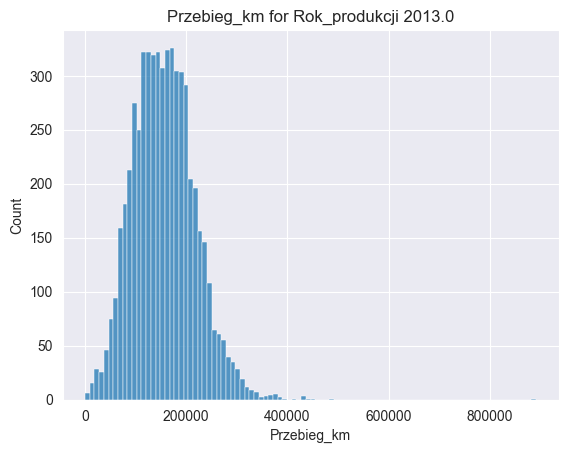

2014.0
Przebieg_km
140000.0    49
180000.0    48
150000.0    41
170000.0    41
120000.0    39
            ..
186103.0     1
256540.0     1
80951.0      1
39854.0      1
84950.0      1
Name: count, Length: 2511, dtype: int64


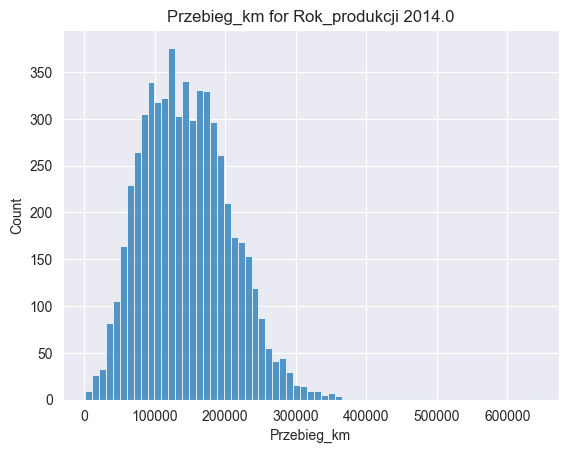

2016.0
Przebieg_km
150000.0    47
160000.0    47
120000.0    45
90000.0     43
130000.0    42
            ..
33300.0      1
159110.0     1
141693.0     1
43895.0      1
134477.0     1
Name: count, Length: 3571, dtype: int64


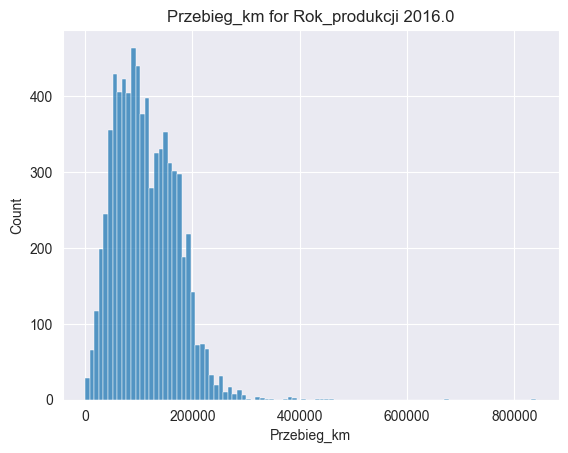

2011.0
Przebieg_km
190000.0    73
150000.0    67
220000.0    60
180000.0    56
140000.0    56
            ..
166694.0     1
145830.0     1
211484.0     1
150800.0     1
105861.0     1
Name: count, Length: 2671, dtype: int64


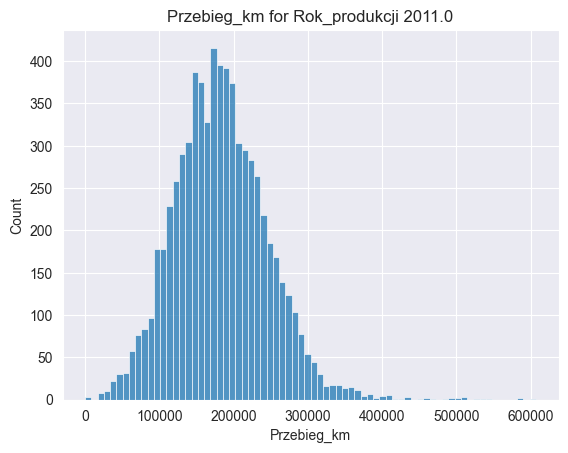

2009.0
Przebieg_km
220000.0    79
190000.0    76
180000.0    61
160000.0    59
200000.0    58
            ..
168647.0     1
188637.0     1
184442.0     1
40499.0      1
122708.0     1
Name: count, Length: 2655, dtype: int64


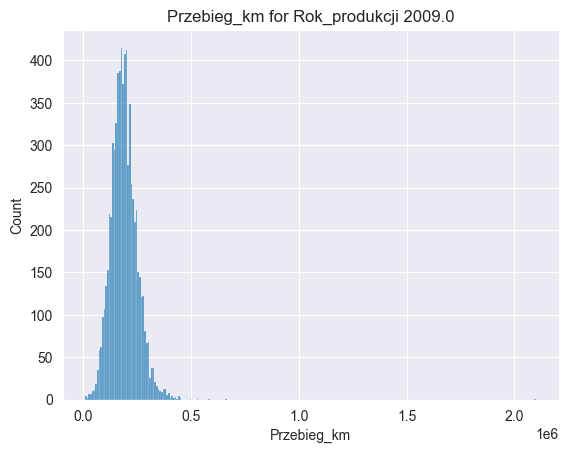

2021.0
Przebieg_km
1.0       3502
5.0       2964
10.0      1289
2.0        372
6.0        284
          ... 
1900.0       1
3449.0       1
2128.0       1
2800.0       1
544.0        1
Name: count, Length: 193, dtype: int64


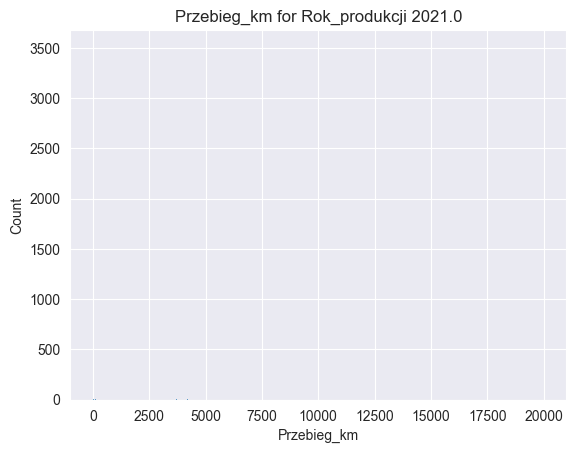

2006.0
Przebieg_km
250000.0    53
220000.0    52
240000.0    50
230000.0    49
190000.0    46
            ..
52000.0      1
210606.0     1
305746.0     1
154700.0     1
215500.0     1
Name: count, Length: 2236, dtype: int64


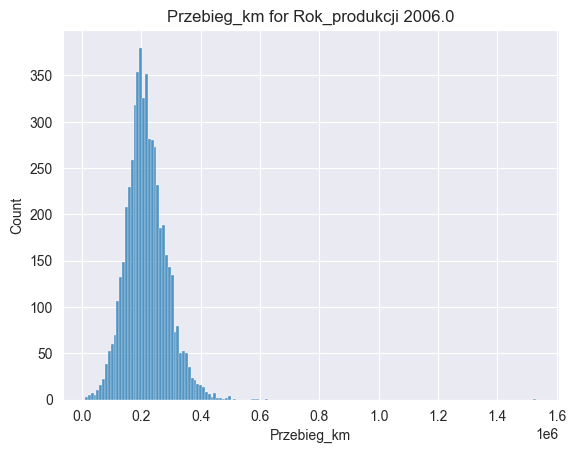

2017.0
Przebieg_km
50000.0     40
60000.0     39
49000.0     38
72000.0     38
65000.0     37
            ..
18643.0      1
21543.0      1
73396.0      1
78122.0      1
115463.0     1
Name: count, Length: 4514, dtype: int64


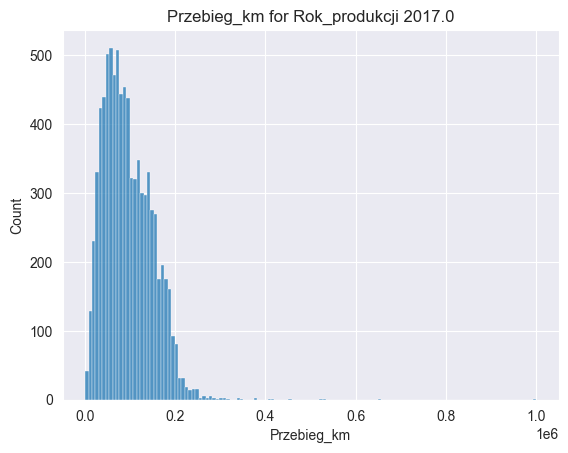

2004.0
Przebieg_km
220000.0    54
250000.0    39
230000.0    33
240000.0    33
260000.0    31
            ..
160298.0     1
364356.0     1
302100.0     1
416000.0     1
264200.0     1
Name: count, Length: 1483, dtype: int64


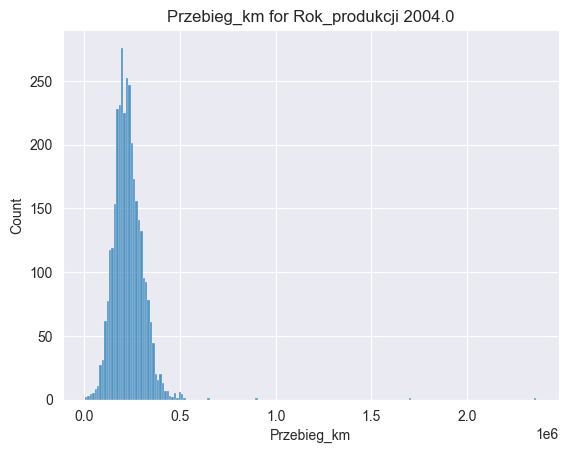

2020.0
Przebieg_km
1.0        2008
5.0        1388
10.0        669
2.0         284
6.0         165
           ... 
7345.0        1
625.0         1
10650.0       1
3493.0        1
27218.0       1
Name: count, Length: 1797, dtype: int64


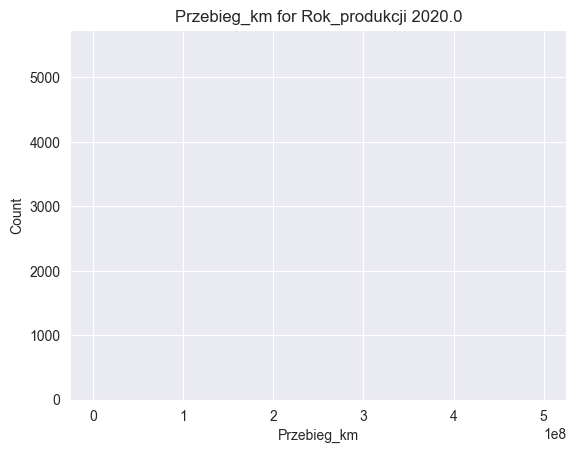

nan
Series([], Name: count, dtype: int64)


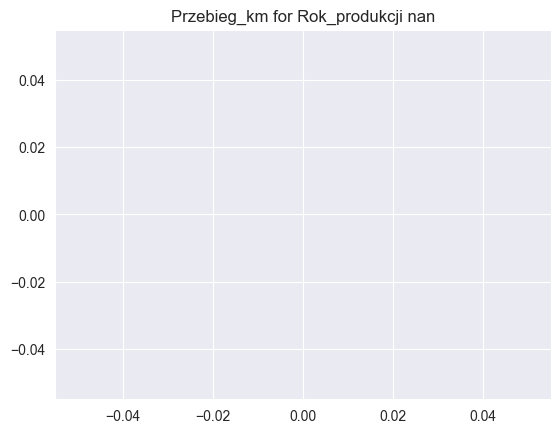

2008.0
Przebieg_km
220000.0    84
200000.0    71
240000.0    70
180000.0    63
230000.0    61
            ..
203720.0     1
130794.0     1
223876.0     1
193705.0     1
218550.0     1
Name: count, Length: 2685, dtype: int64


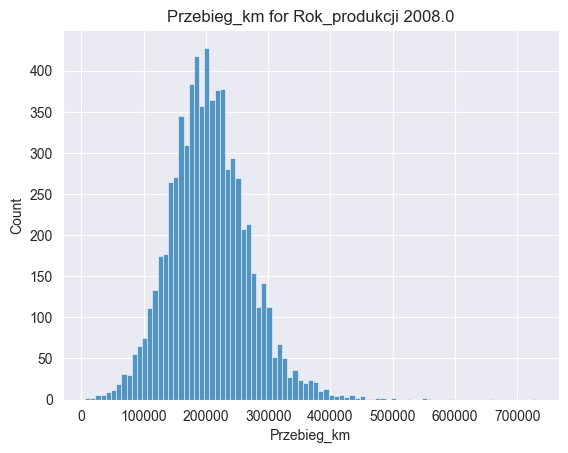

2012.0
Przebieg_km
170000.0    51
180000.0    49
150000.0    46
190000.0    45
200000.0    43
            ..
212700.0     1
67300.0      1
257591.0     1
192994.0     1
75789.0      1
Name: count, Length: 2534, dtype: int64


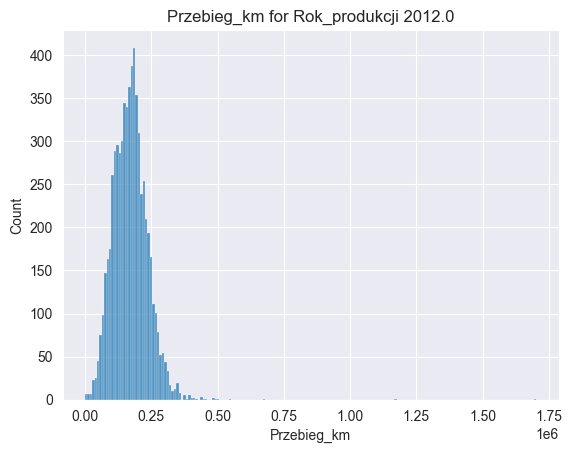

2002.0
Przebieg_km
250000.0    24
220000.0    23
240000.0    20
280000.0    17
230000.0    17
            ..
90389.0      1
316020.0     1
283000.0     1
380507.0     1
343387.0     1
Name: count, Length: 949, dtype: int64


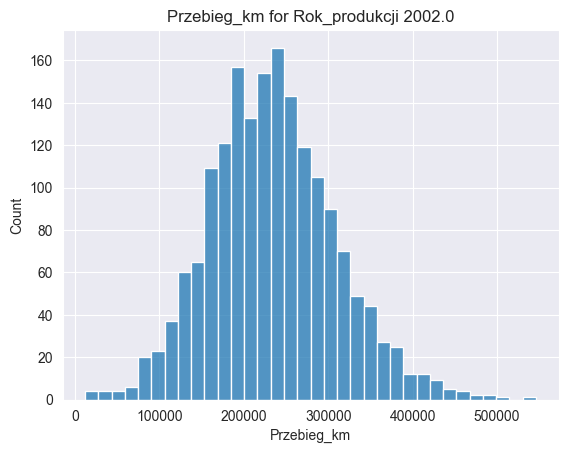

1989.0
Przebieg_km
180000.0    3
240000.0    2
272000.0    2
290000.0    2
120000.0    2
           ..
389000.0    1
171000.0    1
92402.0     1
244900.0    1
212300.0    1
Name: count, Length: 83, dtype: int64


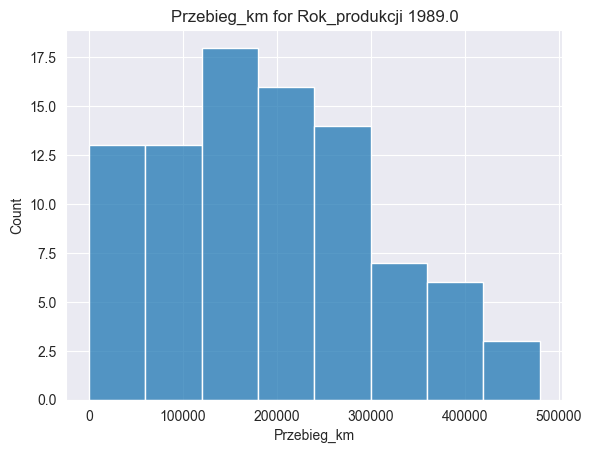

2000.0
Przebieg_km
230000.0    14
250000.0    13
220000.0    11
180000.0    10
260000.0    10
            ..
346000.0     1
216516.0     1
131476.0     1
172846.0     1
215241.0     1
Name: count, Length: 583, dtype: int64


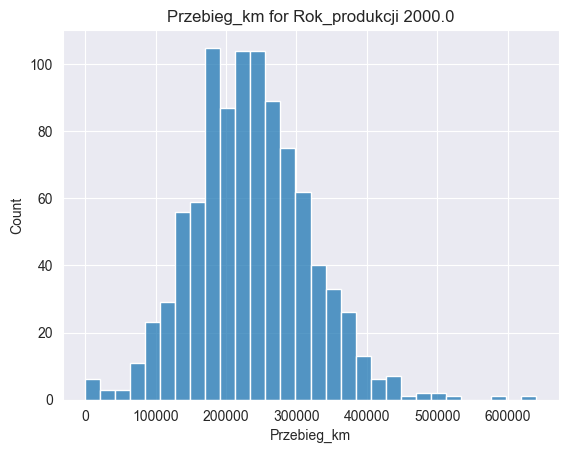

2019.0
Przebieg_km
1.0        75
20000.0    54
5.0        47
19000.0    41
15000.0    39
           ..
88200.0     1
12431.0     1
28405.0     1
34287.0     1
18850.0     1
Name: count, Length: 2866, dtype: int64


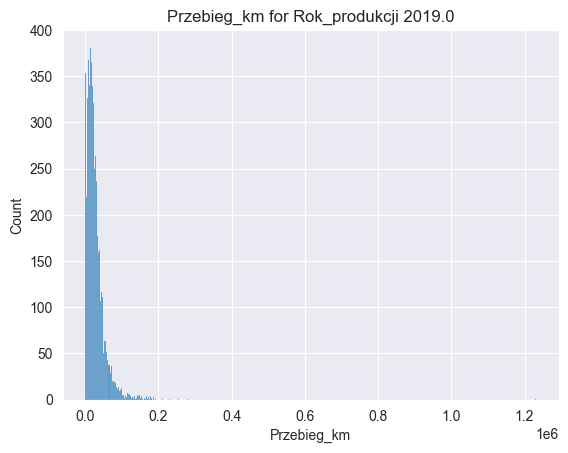

1997.0
Przebieg_km
160000.0    5
270000.0    4
330000.0    4
200000.0    4
238000.0    3
           ..
366553.0    1
272030.0    1
328000.0    1
107000.0    1
251900.0    1
Name: count, Length: 253, dtype: int64


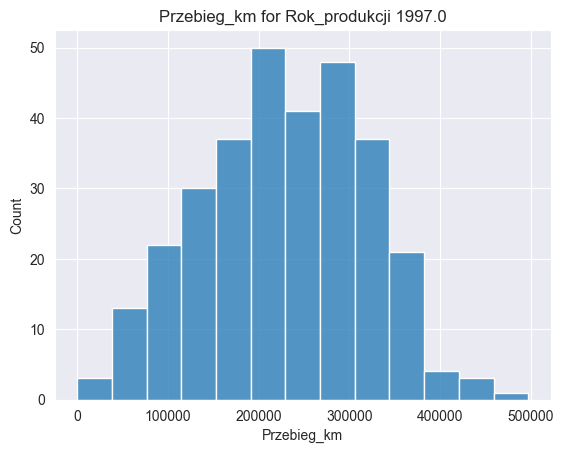

2018.0
Przebieg_km
22000.0     42
35000.0     42
32000.0     41
28000.0     39
45000.0     38
            ..
56029.0      1
64400.0      1
179618.0     1
100037.0     1
22263.0      1
Name: count, Length: 3458, dtype: int64


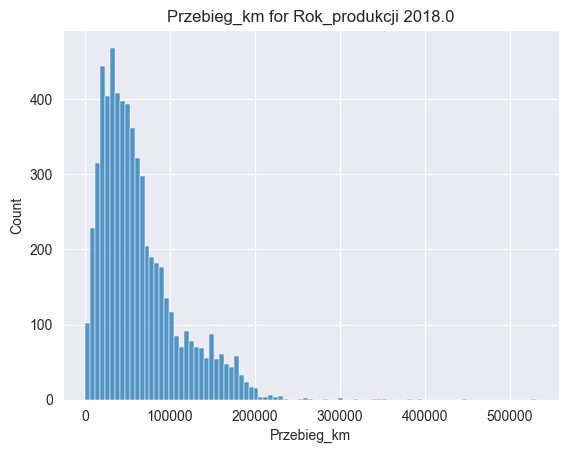

2003.0
Przebieg_km
230000.0    36
240000.0    30
250000.0    25
260000.0    24
180000.0    24
            ..
211100.0     1
249727.0     1
18900.0      1
273862.0     1
179138.0     1
Name: count, Length: 1196, dtype: int64


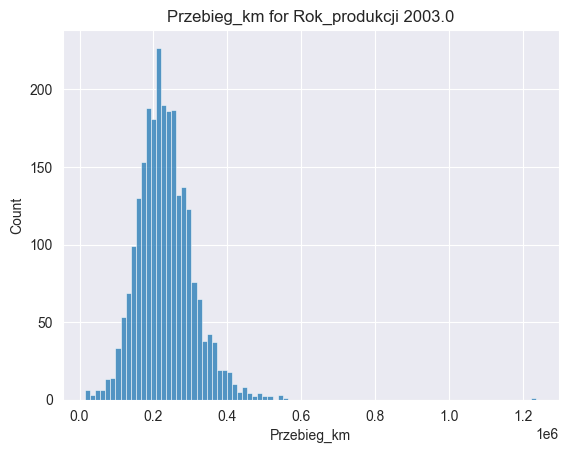

2001.0
Przebieg_km
280000.0    16
260000.0    14
250000.0    12
170000.0    12
190000.0    11
            ..
289756.0     1
50000.0      1
292174.0     1
352179.0     1
166420.0     1
Name: count, Length: 754, dtype: int64


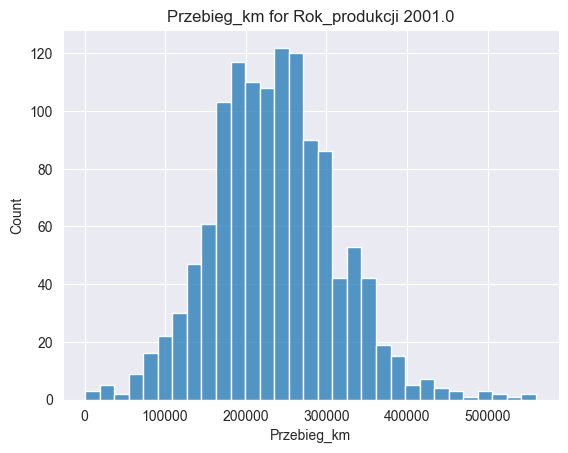

1994.0
Przebieg_km
195000.0    2
179000.0    2
148000.0    2
190000.0    2
240000.0    2
           ..
103000.0    1
38000.0     1
86701.0     1
175000.0    1
253000.0    1
Name: count, Length: 127, dtype: int64


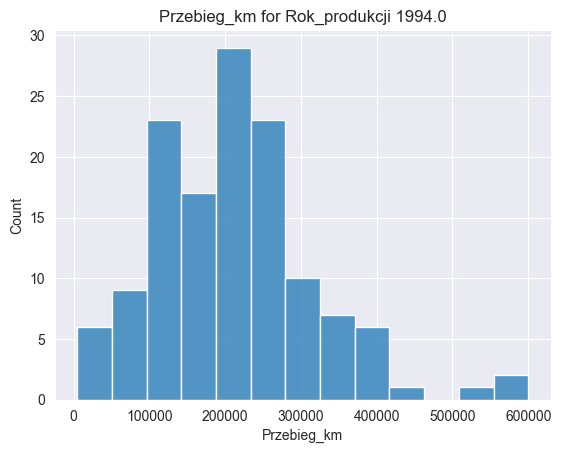

1995.0
Przebieg_km
250000.0    3
200000.0    3
166000.0    2
228800.0    2
400000.0    2
           ..
382564.0    1
177193.0    1
420000.0    1
190519.0    1
297500.0    1
Name: count, Length: 158, dtype: int64


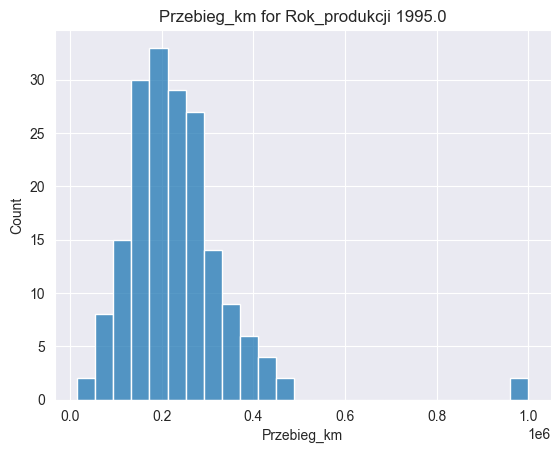

1991.0
Przebieg_km
250000.0    3
400000.0    3
127000.0    2
170000.0    2
201000.0    2
           ..
95000.0     1
48000.0     1
80557.0     1
170225.0    1
490300.0    1
Name: count, Length: 143, dtype: int64


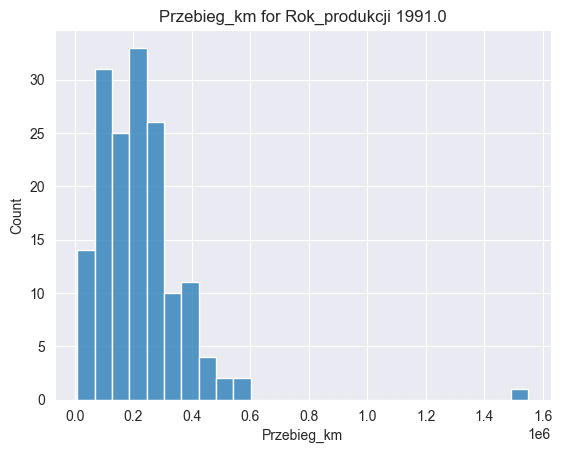

1998.0
Przebieg_km
250000.0    9
290000.0    8
280000.0    6
330000.0    6
260000.0    5
           ..
109741.0    1
174000.0    1
307500.0    1
325219.0    1
186090.0    1
Name: count, Length: 391, dtype: int64


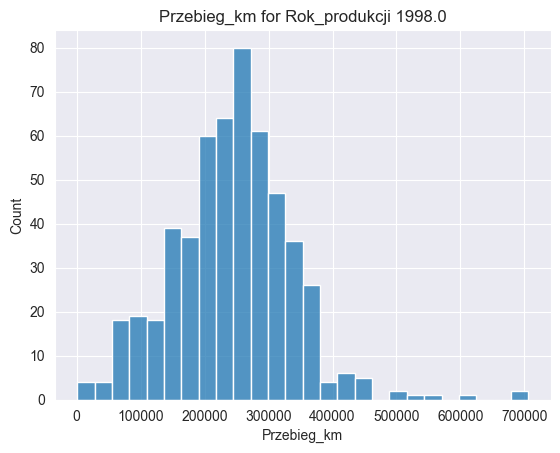

1999.0
Przebieg_km
250000.0    17
280000.0    11
230000.0     9
265000.0     9
240000.0     9
            ..
210115.0     1
241865.0     1
136000.0     1
171600.0     1
232900.0     1
Name: count, Length: 526, dtype: int64


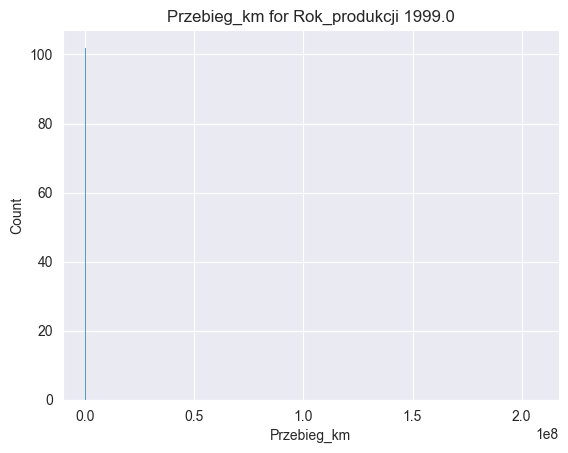

1996.0
Przebieg_km
290000.0    3
270000.0    3
240000.0    3
350000.0    3
390000.0    2
           ..
196000.0    1
314000.0    1
53500.0     1
189066.0    1
155000.0    1
Name: count, Length: 191, dtype: int64


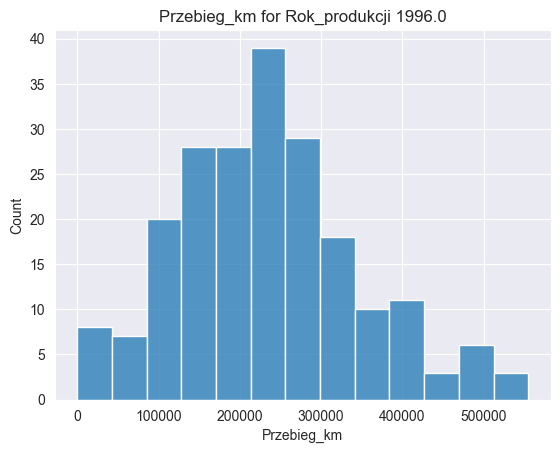

1966.0
Przebieg_km
100000.0    2
37275.0     2
1.0         2
200000.0    2
31815.0     2
10000.0     1
159700.0    1
139000.0    1
3000.0      1
26959.0     1
47522.0     1
58900.0     1
150000.0    1
26892.0     1
999.0       1
6527.0      1
4649.0      1
61000.0     1
Name: count, dtype: int64


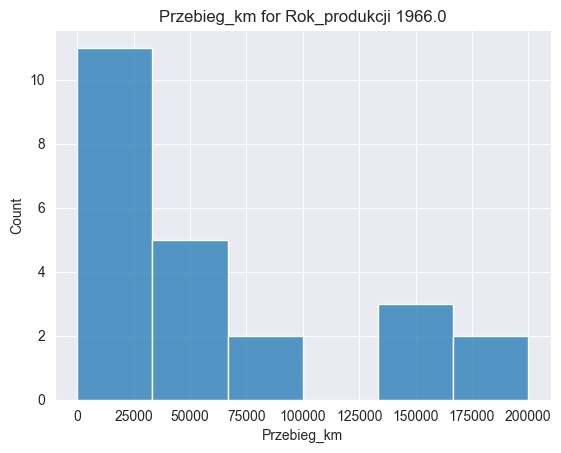

1986.0
Przebieg_km
100000.0    3
150000.0    2
80000.0     2
300000.0    2
223000.0    1
345000.0    1
233326.0    1
185300.0    1
380000.0    1
78000.0     1
22184.0     1
202329.0    1
229000.0    1
170000.0    1
250000.0    1
243368.0    1
160000.0    1
110000.0    1
144000.0    1
108000.0    1
111111.0    1
304627.0    1
276400.0    1
245000.0    1
429400.0    1
201000.0    1
151000.0    1
297081.0    1
149986.0    1
115000.0    1
202500.0    1
237707.0    1
92000.0     1
68000.0     1
152000.0    1
428603.0    1
156000.0    1
105000.0    1
80400.0     1
213696.0    1
316000.0    1
196500.0    1
139005.0    1
185452.0    1
9248.0      1
Name: count, dtype: int64


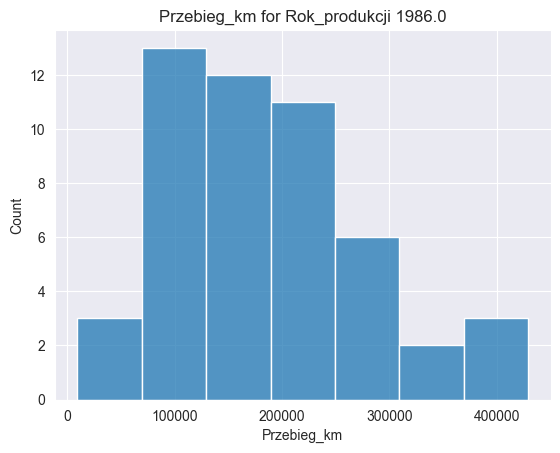

1963.0
Przebieg_km
20.0        2
90000.0     2
47132.0     1
55000.0     1
111111.0    1
500.0       1
99000.0     1
90520.0     1
250000.0    1
Name: count, dtype: int64


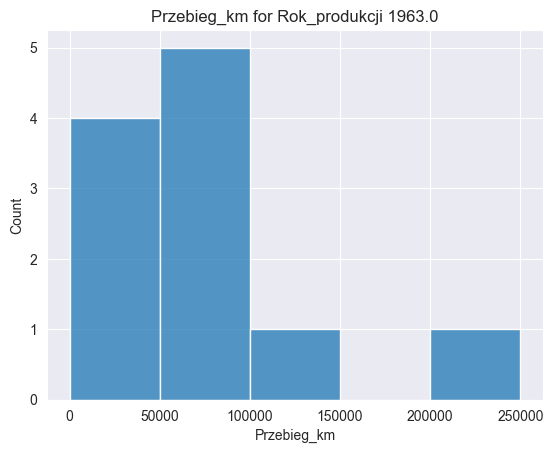

1965.0
Przebieg_km
100000.0    2
111111.0    2
23000.0     2
12500.0     2
10000.0     2
46000.0     2
999999.0    1
18542.0     1
88575.0     1
999.0       1
7000.0      1
31726.0     1
40000.0     1
160932.0    1
53000.0     1
15258.0     1
1500.0      1
83422.0     1
76734.0     1
178.0       1
200.0       1
101924.0    1
72000.0     1
Name: count, dtype: int64


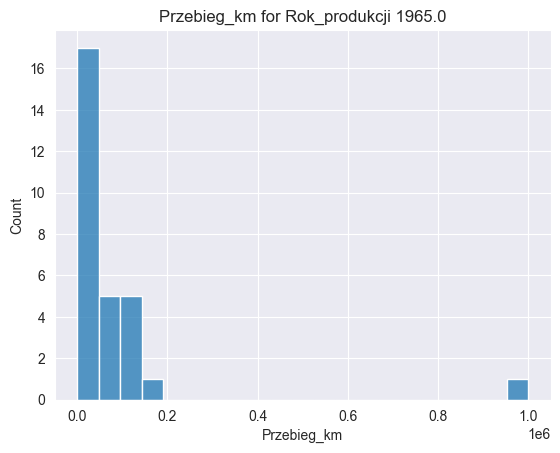

1992.0
Przebieg_km
250000.0    4
330000.0    3
198000.0    2
238000.0    2
219000.0    2
           ..
196000.0    1
274123.0    1
246241.0    1
223000.0    1
231654.0    1
Name: count, Length: 107, dtype: int64


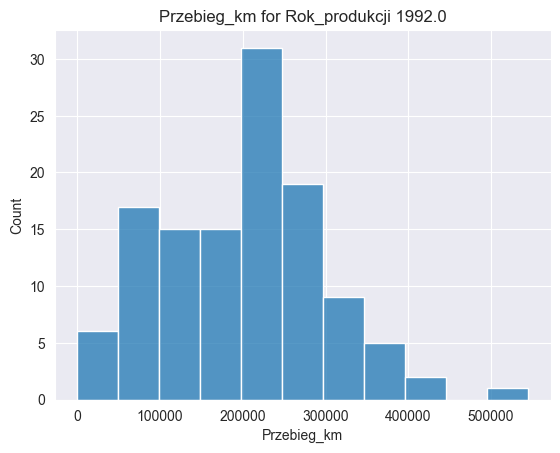

1968.0
Przebieg_km
80000.0     3
120000.0    2
34599.0     2
8700.0      2
35000.0     2
33722.0     2
70000.0     2
68900.0     1
101900.0    1
88812.0     1
151000.0    1
12345.0     1
90000.0     1
3868.0      1
100000.0    1
90520.0     1
68953.0     1
29000.0     1
52200.0     1
68400.0     1
22160.0     1
60000.0     1
Name: count, dtype: int64


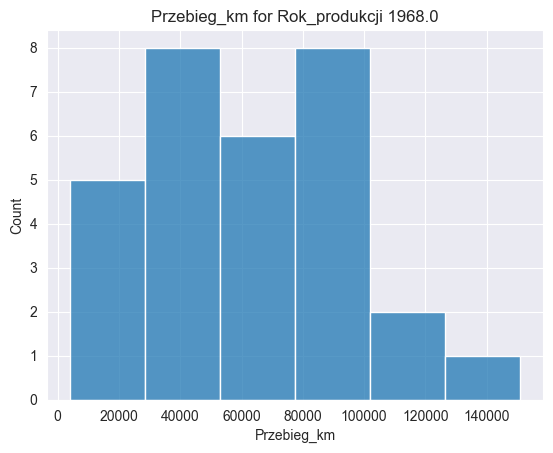

1979.0
Przebieg_km
100000.0    3
88888.0     1
1111.0      1
124000.0    1
73851.0     1
666.0       1
55730.0     1
200000.0    1
111111.0    1
70000.0     1
131000.0    1
85000.0     1
233390.0    1
470000.0    1
38000.0     1
1235.0      1
115000.0    1
10000.0     1
84320.0     1
125000.0    1
114000.0    1
158030.0    1
90000.0     1
120000.0    1
175000.0    1
1500.0      1
109000.0    1
287000.0    1
67366.0     1
290000.0    1
23000.0     1
80000.0     1
Name: count, dtype: int64


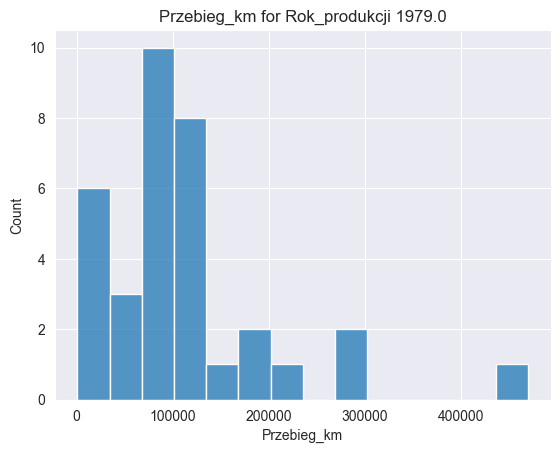

1981.0
Przebieg_km
94000.0     2
62000.0     2
100000.0    2
92332.0     1
28500.0     1
166994.0    1
90000.0     1
57000.0     1
65144.0     1
222000.0    1
175629.0    1
209800.0    1
128633.0    1
5000.0      1
270000.0    1
67554.0     1
230000.0    1
15.0        1
11066.0     1
225000.0    1
Name: count, dtype: int64


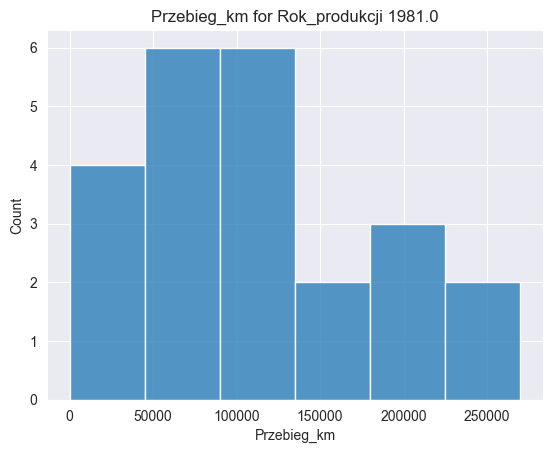

1964.0
Przebieg_km
20795.0     3
93897.0     2
49000.0     2
47109.0     1
25000.0     1
96252.0     1
34773.0     1
115000.0    1
90000.0     1
66581.0     1
777.0       1
248000.0    1
4010.0      1
9255.0      1
80000.0     1
48505.0     1
250200.0    1
10000.0     1
80327.0     1
57882.0     1
100000.0    1
1111.0      1
19753.0     1
9600.0      1
Name: count, dtype: int64


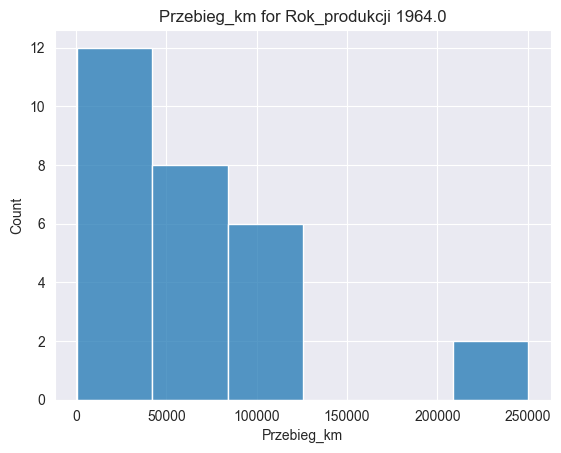

1934.0
Przebieg_km
9527.0     2
11111.0    2
Name: count, dtype: int64


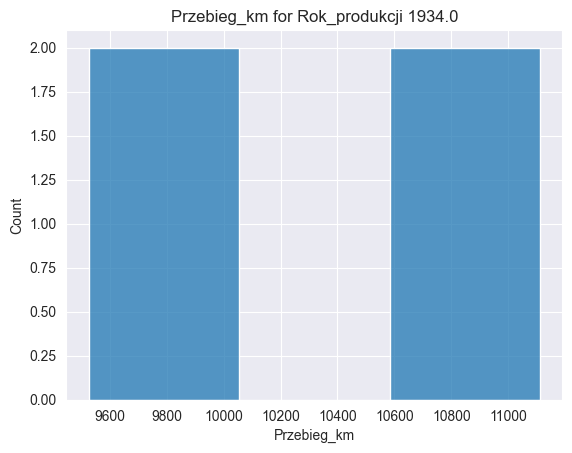

1971.0
Przebieg_km
64000.0     2
50000.0     2
83000.0     2
145000.0    2
80000.0     2
10000.0     1
77000.0     1
84000.0     1
8670.0      1
85000.0     1
117733.0    1
200000.0    1
96000.0     1
5303.0      1
93000.0     1
13132.0     1
Name: count, dtype: int64


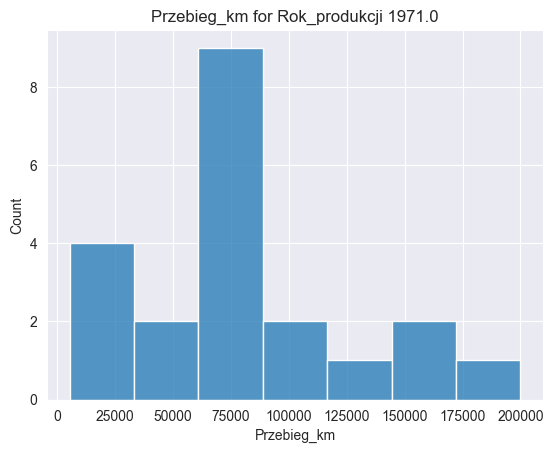

1985.0
Przebieg_km
185000.0    2
297000.0    2
210000.0    2
80000.0     1
208000.0    1
114064.0    1
2000.0      1
400.0       1
75245.0     1
100927.0    1
87000.0     1
193000.0    1
80200.0     1
174000.0    1
253400.0    1
382283.0    1
132863.0    1
20056.0     1
189000.0    1
82714.0     1
320000.0    1
54800.0     1
35155.0     1
141314.0    1
54399.0     1
165700.0    1
300000.0    1
169000.0    1
22000.0     1
70281.0     1
330000.0    1
141900.0    1
115000.0    1
109000.0    1
175414.0    1
175000.0    1
50.0        1
181000.0    1
90000.0     1
46000.0     1
Name: count, dtype: int64


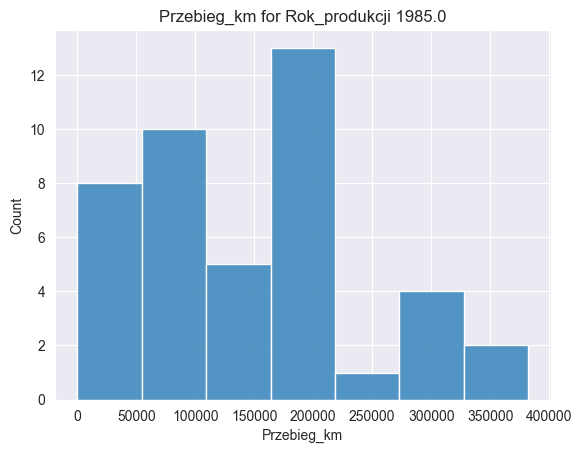

1988.0
Przebieg_km
160000.0    3
128000.0    2
400000.0    2
140000.0    2
155000.0    2
           ..
280000.0    1
227000.0    1
115000.0    1
74500.0     1
258700.0    1
Name: count, Length: 67, dtype: int64


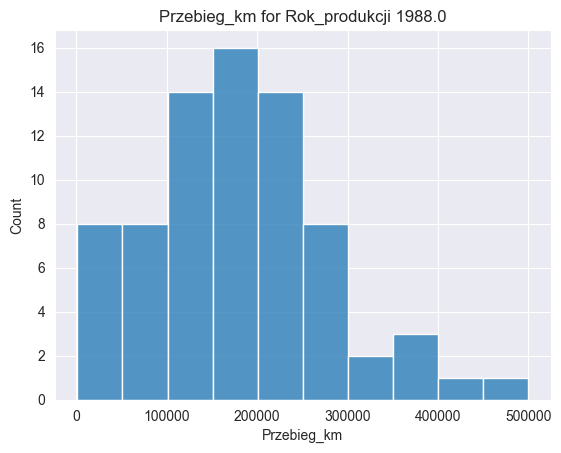

1993.0
Przebieg_km
175000.0    2
220000.0    2
318000.0    2
400000.0    2
343257.0    2
           ..
130700.0    1
180650.0    1
360000.0    1
193200.0    1
16000.0     1
Name: count, Length: 120, dtype: int64


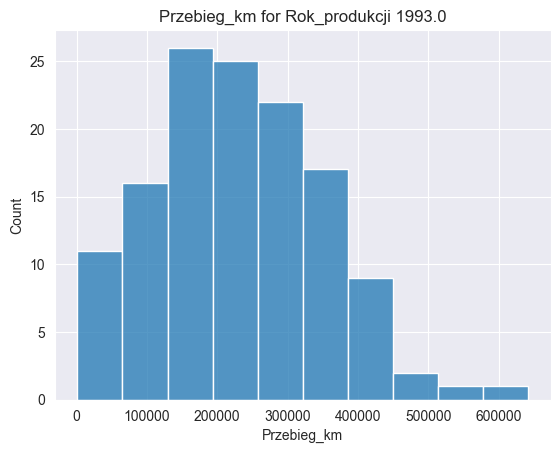

1980.0
Przebieg_km
98000.0     3
109000.0    2
18057.0     2
215000.0    1
159000.0    1
74000.0     1
110910.0    1
64661.0     1
315000.0    1
200000.0    1
241000.0    1
65000.0     1
68000.0     1
92800.0     1
38000.0     1
14300.0     1
61000.0     1
268800.0    1
93000.0     1
90800.0     1
38601.0     1
557000.0    1
209221.0    1
130000.0    1
10050.0     1
72000.0     1
209000.0    1
365000.0    1
Name: count, dtype: int64


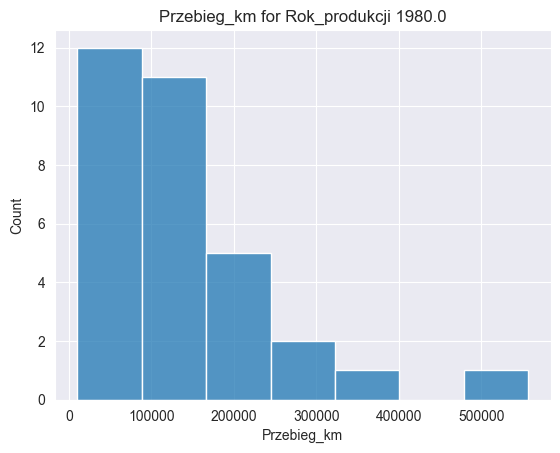

1990.0
Przebieg_km
120000.0    3
340000.0    2
174000.0    2
250000.0    2
36047.0     2
           ..
30000.0     1
182536.0    1
359000.0    1
113000.0    1
214000.0    1
Name: count, Length: 95, dtype: int64


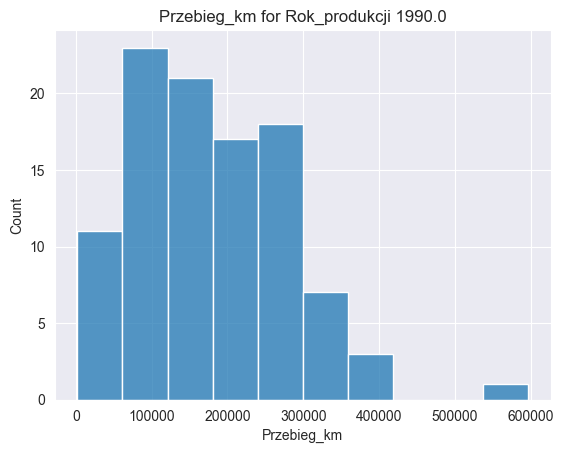

1957.0
Przebieg_km
43318.0     2
11111.0     2
29595.0     2
14631.0     2
1.0         1
126853.0    1
777.0       1
80000.0     1
35000.0     1
26383.0     1
123156.0    1
Name: count, dtype: int64


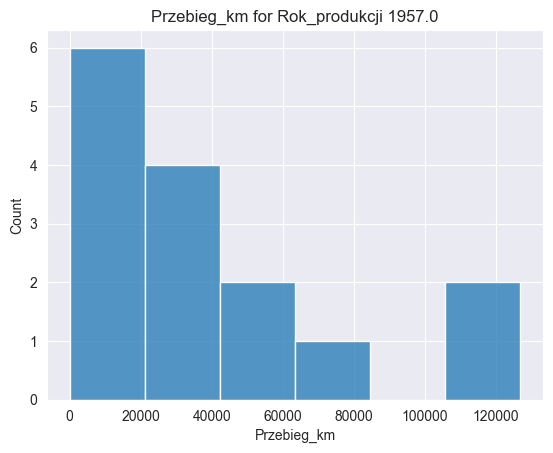

1987.0
Przebieg_km
126580.0    2
105000.0    2
438000.0    2
180000.0    2
295000.0    2
           ..
235057.0    1
97000.0     1
37638.0     1
168000.0    1
480000.0    1
Name: count, Length: 67, dtype: int64


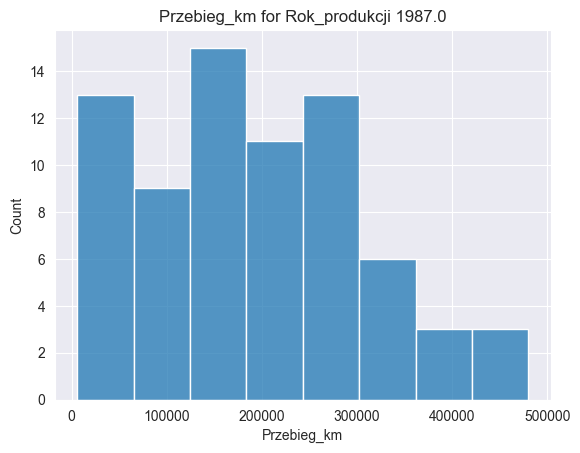

1983.0
Przebieg_km
310000.0    2
121000.0    2
200000.0    2
150000.0    2
66237.0     1
60000.0     1
148000.0    1
99999.0     1
75000.0     1
95000.0     1
221000.0    1
158800.0    1
343000.0    1
86000.0     1
112204.0    1
202000.0    1
162000.0    1
190000.0    1
50000.0     1
59140.0     1
144000.0    1
197000.0    1
190650.0    1
87000.0     1
116671.0    1
245000.0    1
180000.0    1
54000.0     1
120345.0    1
80000.0     1
294000.0    1
60293.0     1
160000.0    1
223000.0    1
134000.0    1
185000.0    1
57264.0     1
173500.0    1
Name: count, dtype: int64


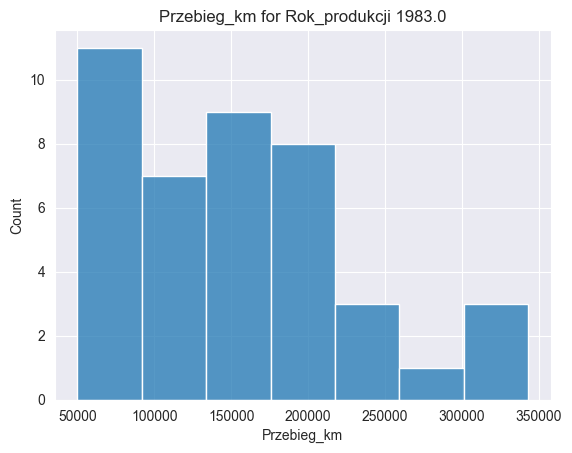

1967.0
Przebieg_km
55000.0       3
100000.0      2
81000.0       2
30000.0       1
777.0         1
90000.0       1
35000.0       1
99999.0       1
1000.0        1
99999999.0    1
141000.0      1
560090.0      1
10000.0       1
57000.0       1
250000.0      1
999999.0      1
87000.0       1
Name: count, dtype: int64


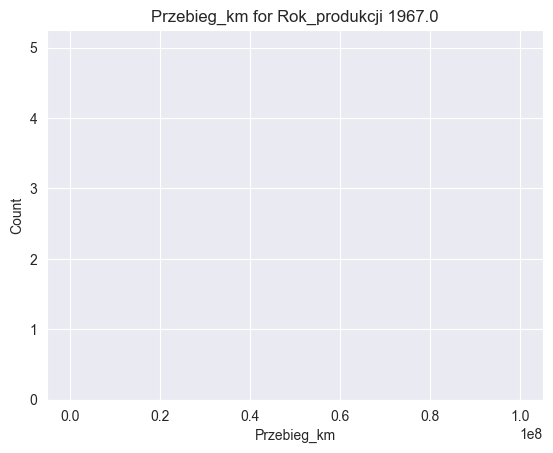

1969.0
Przebieg_km
250.0       5
100000.0    4
79453.0     2
90000.0     2
78500.0     2
112255.0    2
76400.0     1
1.0         1
96191.0     1
50000.0     1
85364.0     1
96000.0     1
94930.0     1
34500.0     1
62450.0     1
5000.0      1
98686.0     1
99999.0     1
68000.0     1
52000.0     1
88777.0     1
80000.0     1
Name: count, dtype: int64


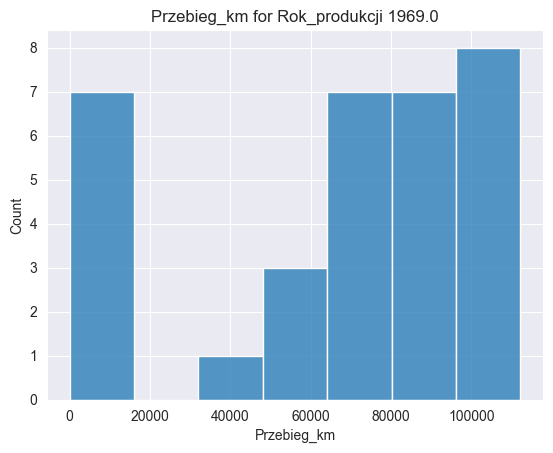

1958.0
Przebieg_km
40000.0     2
87990.0     2
85000.0     2
33232.0     1
100000.0    1
999999.0    1
8000.0      1
29700.0     1
85869.0     1
45890.0     1
Name: count, dtype: int64


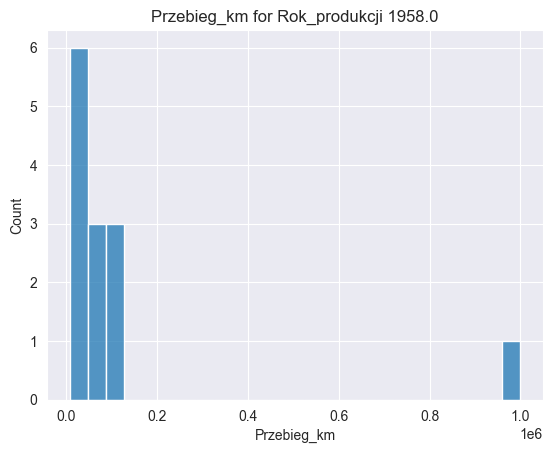

1984.0
Przebieg_km
100000.0    2
110000.0    1
172000.0    1
89200.0     1
129000.0    1
162255.0    1
193256.0    1
125000.0    1
42526.0     1
250000.0    1
519000.0    1
28180.0     1
214000.0    1
39000.0     1
254000.0    1
138000.0    1
111486.0    1
60000.0     1
178401.0    1
19000.0     1
19400.0     1
10000.0     1
179000.0    1
196909.0    1
240000.0    1
1000.0      1
102000.0    1
29269.0     1
302232.0    1
315435.0    1
143651.0    1
314000.0    1
272000.0    1
38483.0     1
90406.0     1
145000.0    1
Name: count, dtype: int64


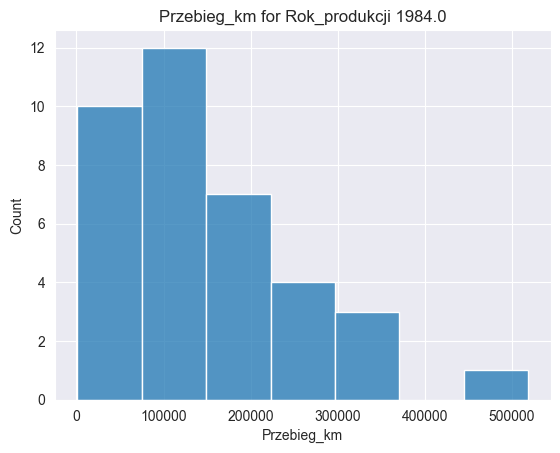

1953.0
Przebieg_km
86450.0     2
66679.0     2
10000.0     2
1000.0      1
99999.0     1
111111.0    1
Name: count, dtype: int64


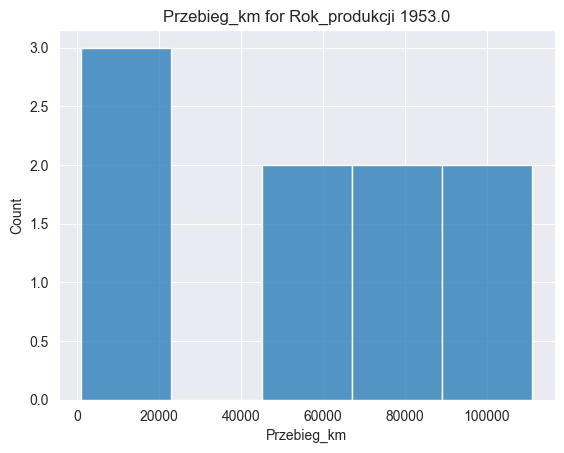

1973.0
Przebieg_km
125000.0    2
216000.0    2
120359.0    2
84000.0     1
100.0       1
93342.0     1
124675.0    1
21000.0     1
27317.0     1
65973.0     1
85900.0     1
1000.0      1
64556.0     1
165000.0    1
61500.0     1
28000.0     1
30000.0     1
300000.0    1
157000.0    1
121000.0    1
144000.0    1
269745.0    1
28188.0     1
75000.0     1
18000.0     1
146500.0    1
6431.0      1
99999.0     1
58575.0     1
120000.0    1
Name: count, dtype: int64


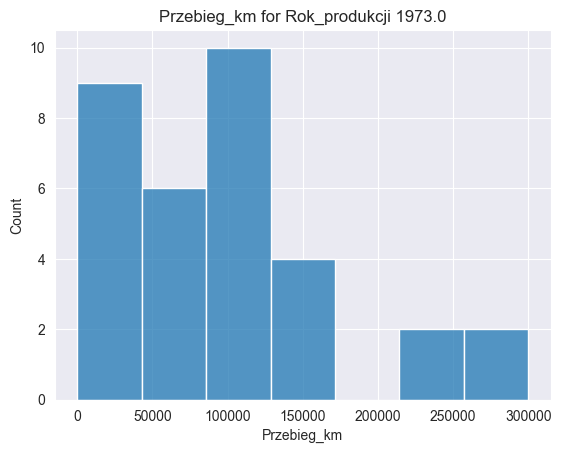

1972.0
Przebieg_km
189000.0    2
50000.0     2
52640.0     2
120000.0    2
148318.0    2
100000.0    2
48610.0     2
25620.0     1
2350.0      1
166000.0    1
82977.0     1
78420.0     1
67000.0     1
158000.0    1
119000.0    1
99000.0     1
158900.0    1
96602.0     1
167000.0    1
5000.0      1
155200.0    1
180000.0    1
71000.0     1
70624.0     1
160000.0    1
111111.0    1
31000.0     1
Name: count, dtype: int64


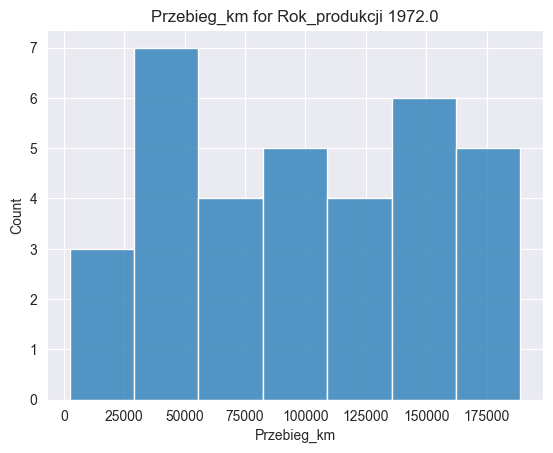

1978.0
Przebieg_km
12900.0     1
188800.0    1
120000.0    1
134000.0    1
93248.0     1
164000.0    1
260000.0    1
6000.0      1
300000.0    1
240.0       1
89000.0     1
155000.0    1
55000.0     1
67146.0     1
280000.0    1
168576.0    1
121000.0    1
76000.0     1
151000.0    1
242.0       1
10555.0     1
125000.0    1
190000.0    1
28000.0     1
100.0       1
1111.0      1
Name: count, dtype: int64


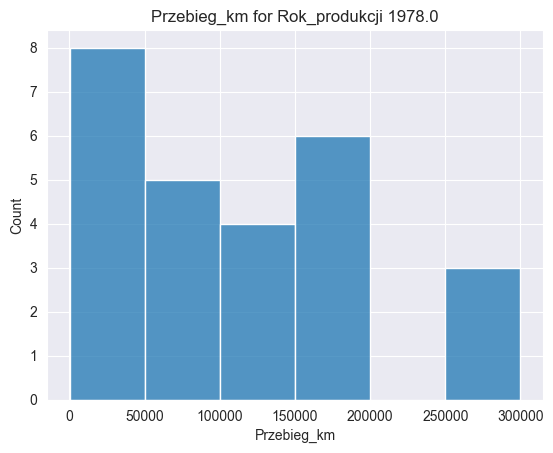

1961.0
Przebieg_km
1.0         3
205000.0    2
15.0        1
144000.0    1
60000.0     1
1000.0      1
12.0        1
27699.0     1
41000.0     1
650.0       1
59600.0     1
111111.0    1
99999.0     1
Name: count, dtype: int64


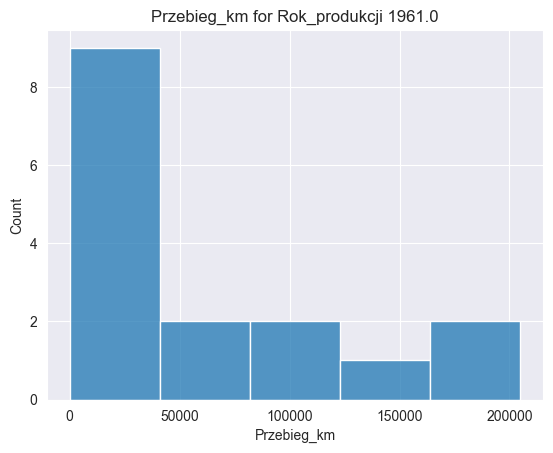

1975.0
Przebieg_km
95000.0     3
200000.0    1
160000.0    1
199392.0    1
47027.0     1
1.0         1
69000.0     1
44000.0     1
155000.0    1
250000.0    1
93620.0     1
40205.0     1
108158.0    1
240000.0    1
32742.0     1
121000.0    1
165000.0    1
85000.0     1
60152.0     1
Name: count, dtype: int64


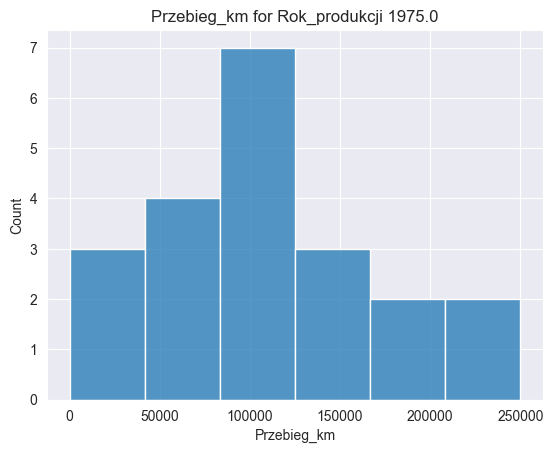

1956.0
Przebieg_km
57956.0     1
146.0       1
88000.0     1
1000.0      1
72000.0     1
14448.0     1
3459.0      1
144000.0    1
Name: count, dtype: int64


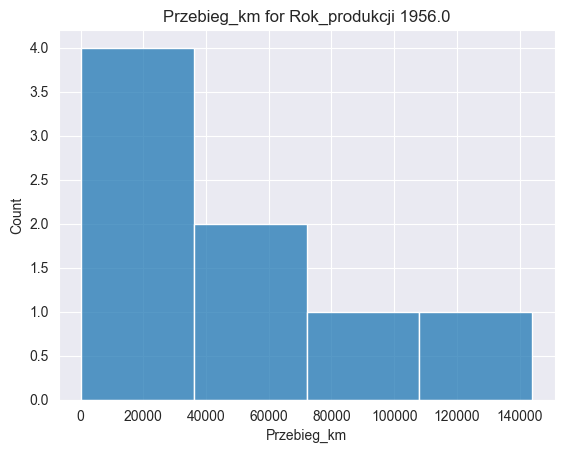

1959.0
Przebieg_km
145.0      2
49500.0    2
48610.0    2
30000.0    1
9999.0     1
55100.0    1
40000.0    1
87645.0    1
Name: count, dtype: int64


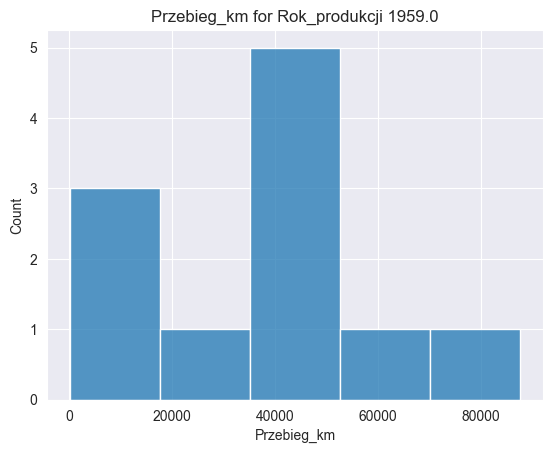

1977.0
Przebieg_km
39124.0     1
354200.0    1
350000.0    1
194085.0    1
11880.0     1
95903.0     1
81000.0     1
98000.0     1
13414.0     1
121964.0    1
100000.0    1
500.0       1
49997.0     1
140000.0    1
77000.0     1
300000.0    1
79000.0     1
163000.0    1
330000.0    1
85000.0     1
57439.0     1
Name: count, dtype: int64


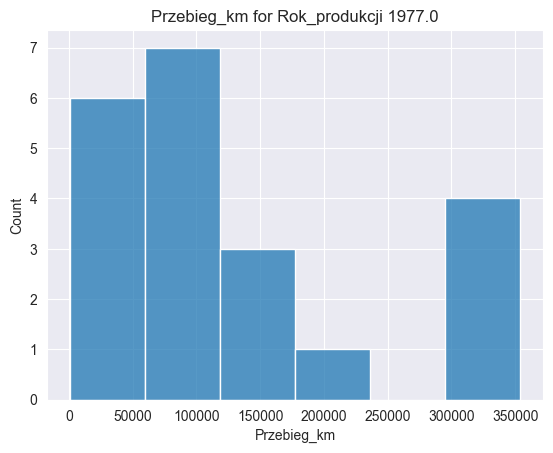

1974.0
Przebieg_km
60611.0     2
59000.0     2
150000.0    2
17667.0     1
24970.0     1
99000.0     1
167000.0    1
14626.0     1
179000.0    1
100000.0    1
127000.0    1
10000.0     1
92000.0     1
60000.0     1
116505.0    1
57138.0     1
23676.0     1
130000.0    1
Name: count, dtype: int64


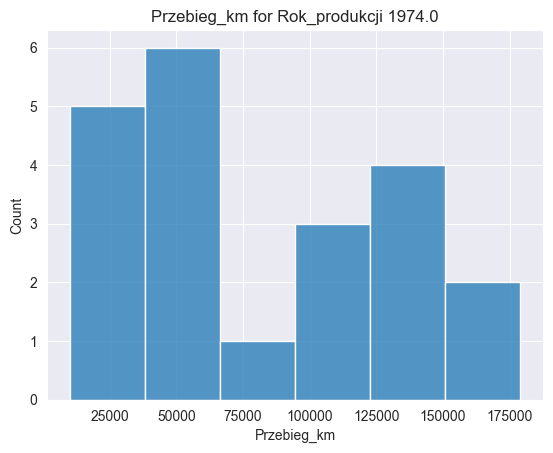

1952.0
Przebieg_km
60272.0     2
64212.0     2
4190.0      1
88551.0     1
90000.0     1
108000.0    1
30000.0     1
Name: count, dtype: int64


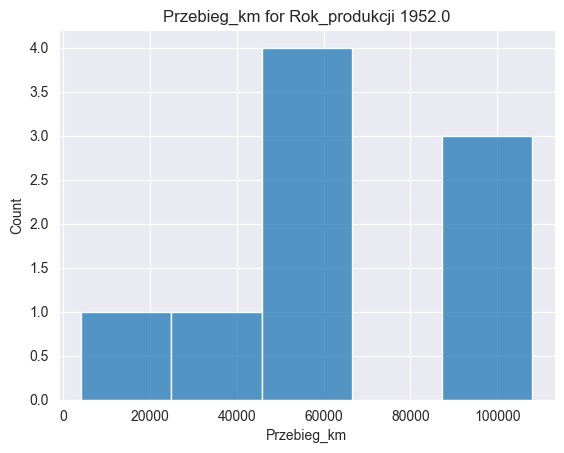

1954.0
Przebieg_km
40375.0    2
34760.0    1
70000.0    1
10000.0    1
100.0      1
Name: count, dtype: int64


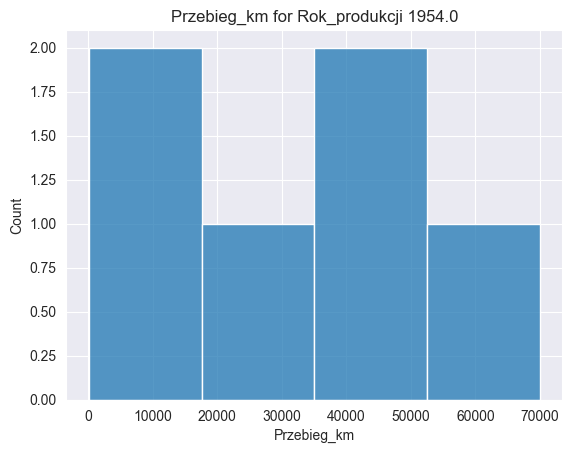

1938.0
Przebieg_km
16285.0    2
400.0      2
84873.0    1
55000.0    1
Name: count, dtype: int64


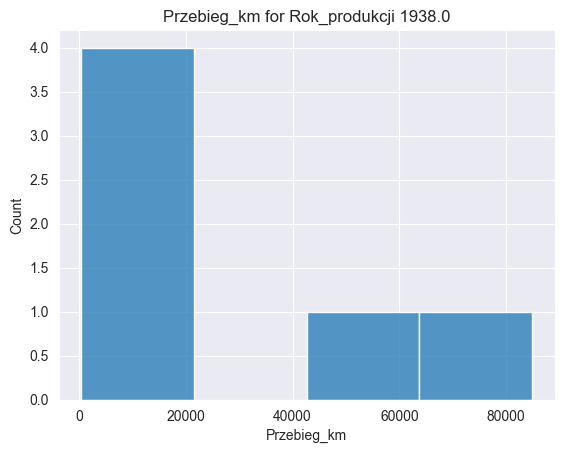

1962.0
Przebieg_km
30783.0     2
65000.0     2
36000.0     1
360.0       1
123.0       1
1.0         1
188557.0    1
250.0       1
70000.0     1
Name: count, dtype: int64


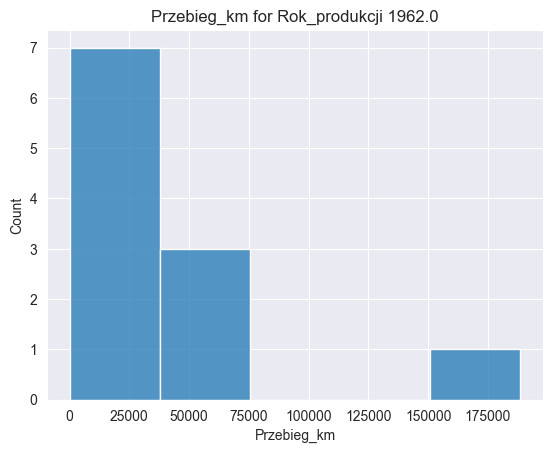

1960.0
Przebieg_km
250.0      3
97000.0    1
99000.0    1
65000.0    1
29000.0    1
25000.0    1
25468.0    1
325.0      1
89551.0    1
3898.0     1
75200.0    1
10000.0    1
60410.0    1
96000.0    1
Name: count, dtype: int64


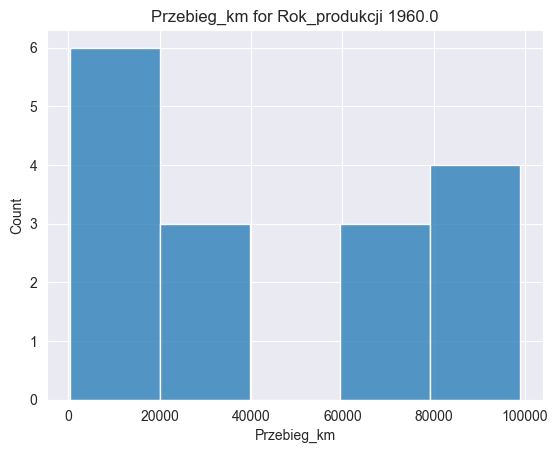

1970.0
Przebieg_km
32000.0     2
52119.0     2
68000.0     1
83999.0     1
34299.0     1
88000.0     1
30000.0     1
150000.0    1
1.0         1
199000.0    1
85000.0     1
19031.0     1
100000.0    1
99999.0     1
18595.0     1
100.0       1
43605.0     1
Name: count, dtype: int64


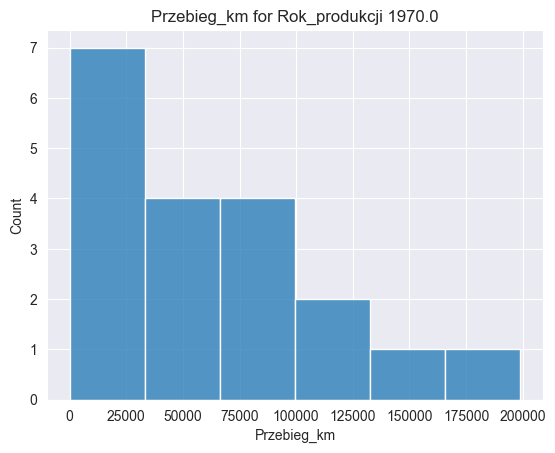

1947.0
Przebieg_km
1050.0      1
100000.0    1
Name: count, dtype: int64


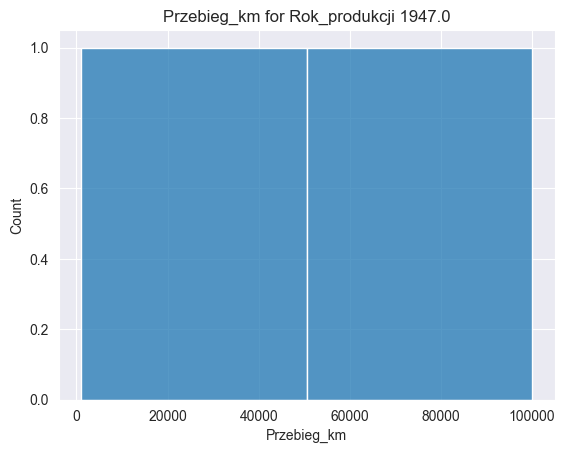

1976.0
Przebieg_km
115000.0    2
40000.0     2
78324.0     1
242580.0    1
6172.0      1
89708.0     1
12308.0     1
10000.0     1
65000.0     1
55000.0     1
140000.0    1
13158.0     1
70000.0     1
1.0         1
139000.0    1
160000.0    1
117000.0    1
11111.0     1
Name: count, dtype: int64


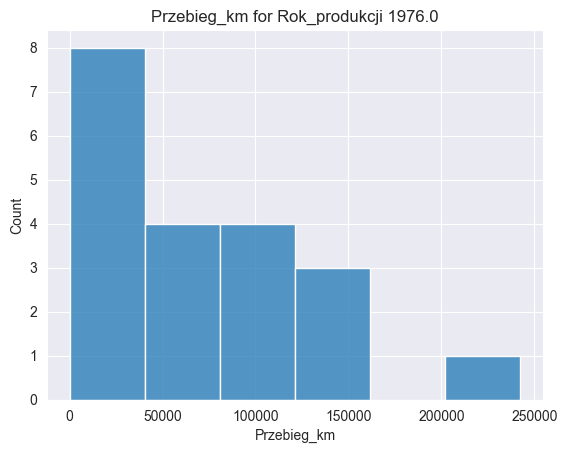

1936.0
Przebieg_km
1.0        2
76000.0    2
40355.0    1
Name: count, dtype: int64


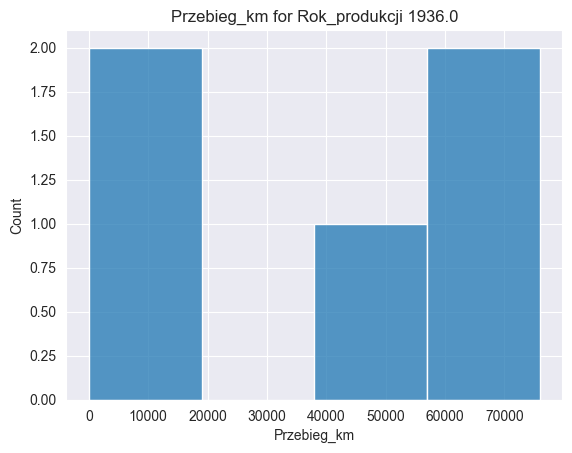

1982.0
Przebieg_km
103000.0    1
350000.0    1
456789.0    1
93140.0     1
184497.0    1
98600.0     1
83000.0     1
379921.0    1
208000.0    1
226585.0    1
140050.0    1
192000.0    1
35800.0     1
245000.0    1
130000.0    1
7250.0      1
120345.0    1
195000.0    1
116000.0    1
125101.0    1
Name: count, dtype: int64


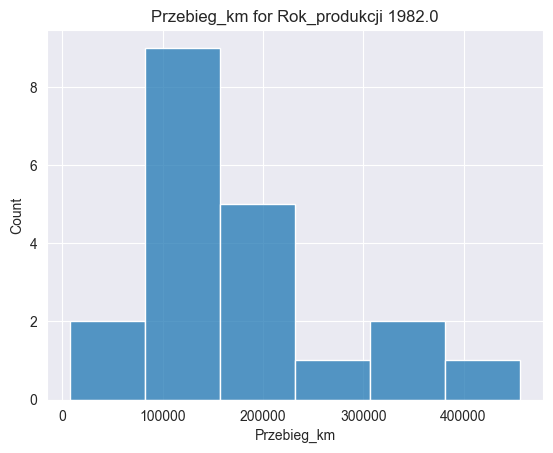

1955.0
Przebieg_km
18282.0     2
50743.0     1
777.0       1
66000.0     1
156000.0    1
41800.0     1
Name: count, dtype: int64


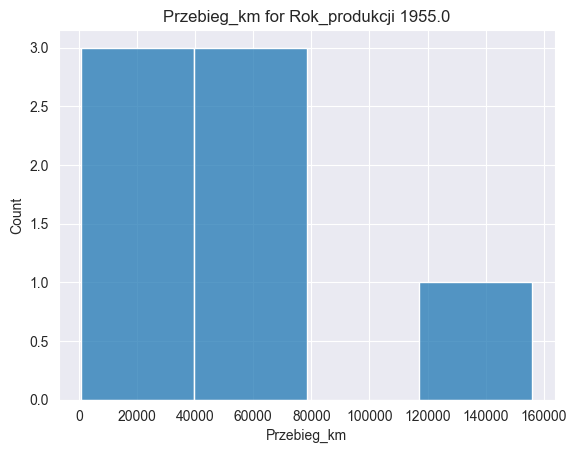

1923.0
Przebieg_km
1.0    1
Name: count, dtype: int64


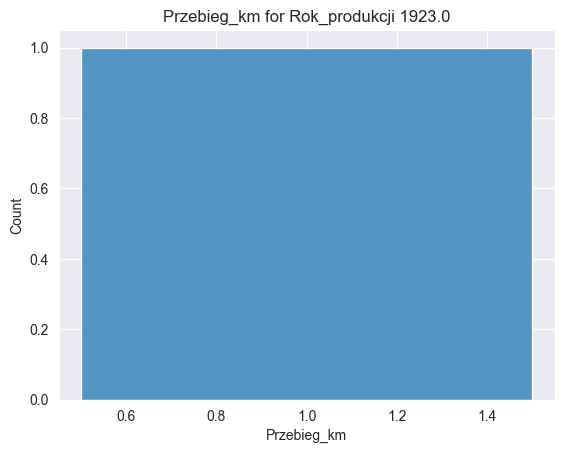

1950.0
Przebieg_km
78000.0     2
100000.0    2
99999.0     1
5000.0      1
111111.0    1
65000.0     1
Name: count, dtype: int64


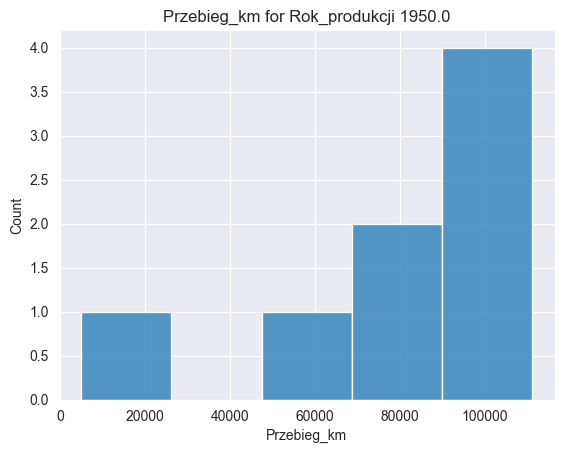

1928.0
Przebieg_km
9999.0    2
Name: count, dtype: int64


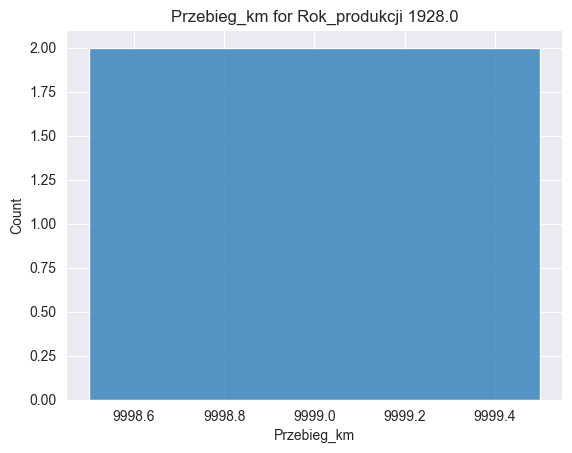

1949.0
Przebieg_km
126000.0    1
12000.0     1
Name: count, dtype: int64


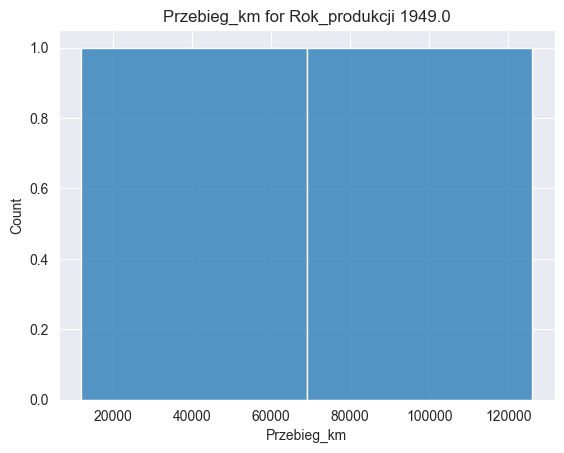

1924.0
Przebieg_km
1.0    1
Name: count, dtype: int64


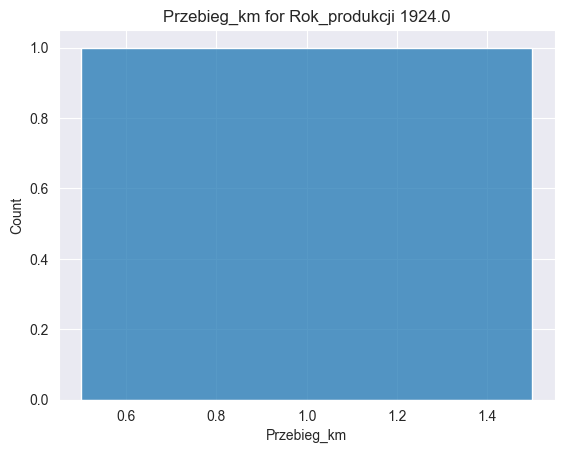

1926.0
Przebieg_km
1.0    1
Name: count, dtype: int64


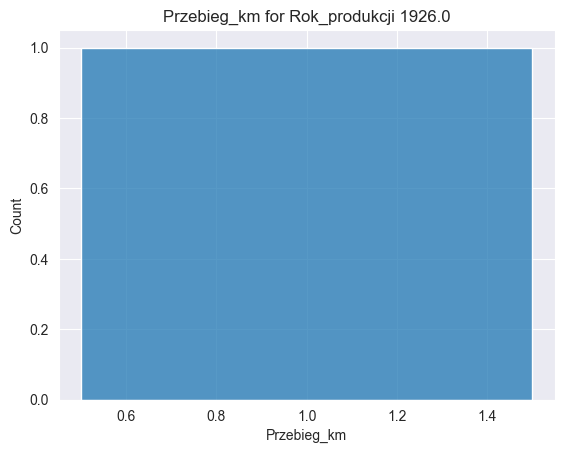

1951.0
Przebieg_km
1.0    1
Name: count, dtype: int64


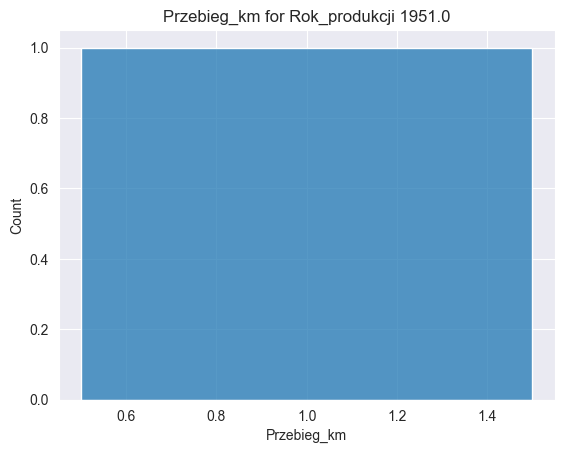

1935.0
Przebieg_km
23813.0    2
Name: count, dtype: int64


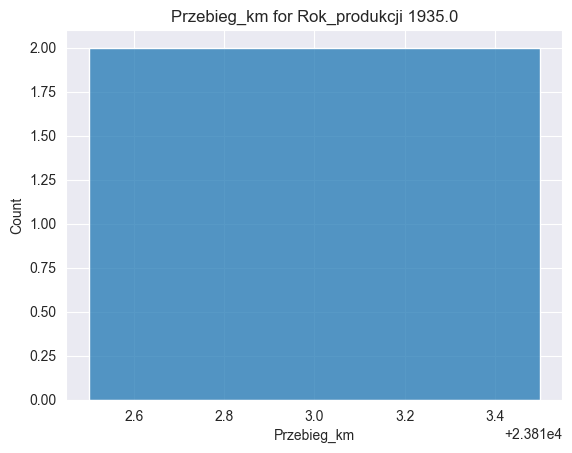

1930.0
Przebieg_km
56000.0    1
Name: count, dtype: int64


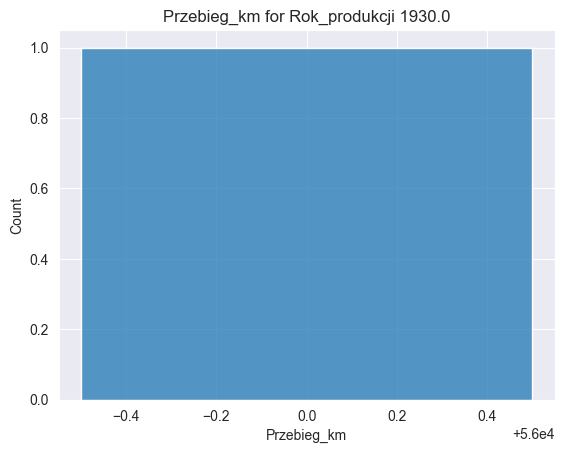

1927.0
Przebieg_km
1.0    1
Name: count, dtype: int64


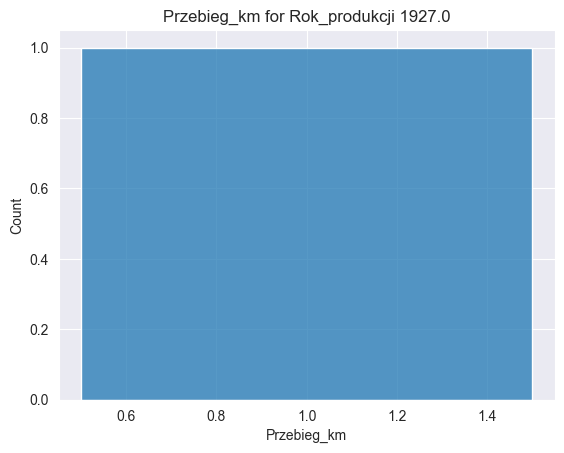

1948.0
Przebieg_km
1.0    1
Name: count, dtype: int64


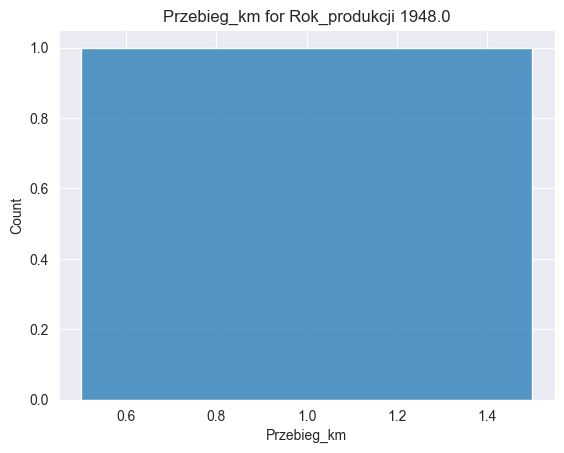

1945.0
Przebieg_km
68000.0    1
Name: count, dtype: int64


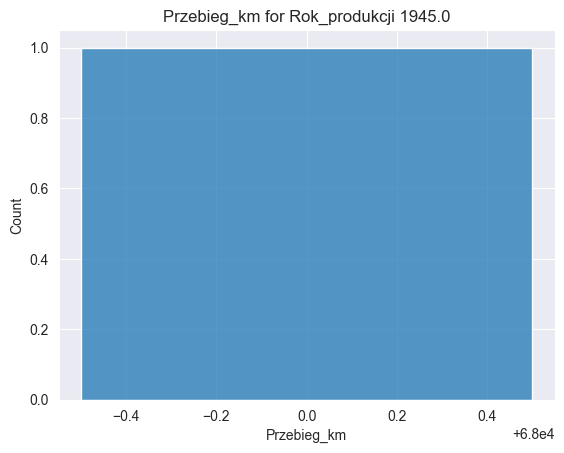

1937.0
Przebieg_km
1.111111e+09    1
6.772000e+03    1
Name: count, dtype: int64


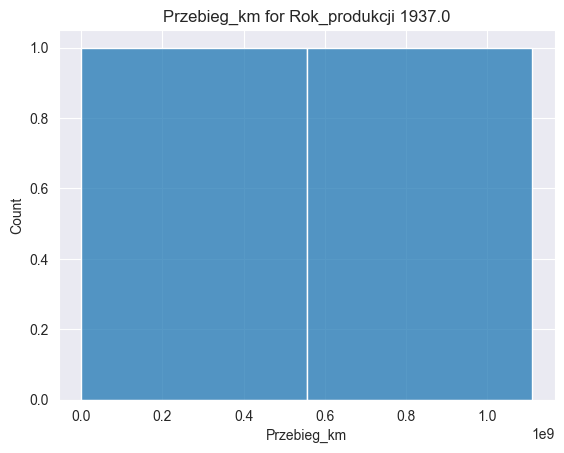

1925.0
Przebieg_km
45110.0    2
Name: count, dtype: int64


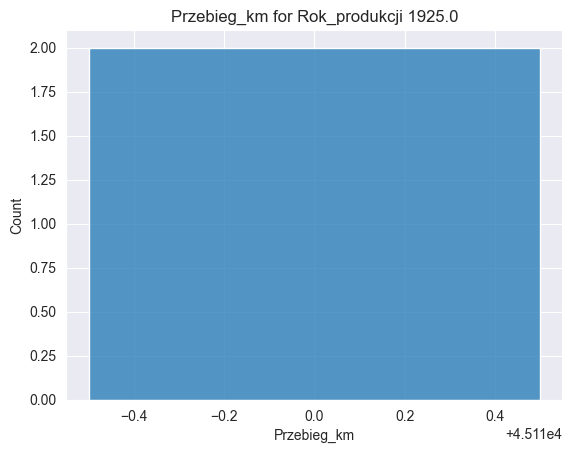

1946.0
Przebieg_km
266550.0    1
Name: count, dtype: int64


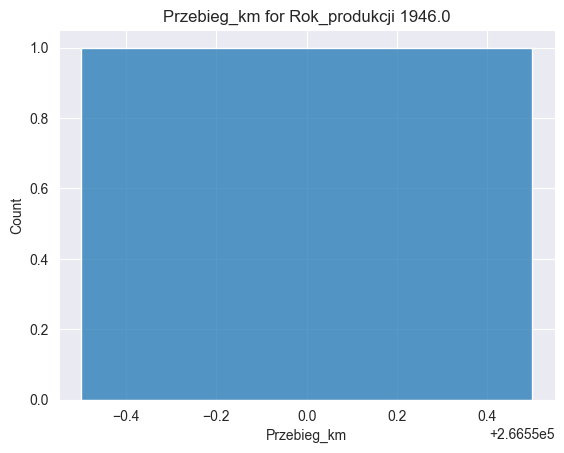

In [200]:
for year in df["Rok_produkcji"].unique():
    print(year)
    print(df[df["Rok_produkcji"] == year]["Przebieg_km"].value_counts())
    sns.histplot(df[df["Rok_produkcji"] == year]["Przebieg_km"])
    plt.title(f"Przebieg_km for Rok_produkcji {year}")
    plt.show()


Let's now check if car make and model are correct

In [196]:
for car_make in df["Marka_pojazdu"].unique():
    print(car_make)
    print(df[df["Marka_pojazdu"] == car_make]["Model_pojazdu"].value_counts())



Renault
Model_pojazdu
Megane             1572
Clio               1277
Scenic              677
Laguna              550
Captur              383
Grand Scenic        312
Kadjar              264
Trafic              245
Espace              226
Talisman            209
Twingo              175
Kangoo              148
Modus               141
Koleos              123
Grand Espace         71
Fluence              60
Thalia               52
Master               48
Zoe                  42
Latitude             14
Vel Satis            12
Other                 7
19                    4
Scenic Conquest       4
Safrane               2
Coupe                 2
4                     2
Avantime              2
10                    1
Express               1
Scenic RX4            1
18                    1
9                     1
Twizy                 1
5                     1
Name: count, dtype: int64
Opel
Model_pojazdu
Astra          3244
Insignia       1655
Corsa          1440
Zafira          796
Meriva       

In [171]:
test_df = pd.read_csv('../data/raw/sales_ads_test.csv')
test_df.Waluta.isna().sum()

np.int64(0)

In [227]:
df[df["Marka_pojazdu"] == "Opel"]

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,Cena_PLN
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,...,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ...",35900.0
26,27,79900,PLN,Used,Opel,Astra,NaN,K (2015-),2020.0,8682.0,...,station_wagon,5.0,blue,Poland,Yes,25/03/2020,01/05/2021,"Karkonoska 50 - 53-015 Wrocław, Dolnośląskie (...","['ABS', 'On-board computer', 'Passengers airba...",79900.0
34,35,10900,PLN,Used,Opel,Vectra,1.9 CDTI Cosmo,C (2002-2008),2005.0,285000.0,...,compact,5.0,gray,NaN,NaN,NaN,30/04/2021,"roosevelta 120 - 62-200 Gniezno, gnieźnieński,...","['ABS', 'Electric front windows', 'Drivers air...",10900.0
64,65,39000,PLN,Used,Opel,Corsa,1.4 16V Cosmo,E (2014-2019),2015.0,42000.0,...,city_cars,5.0,silver,Poland,Yes,NaN,26/04/2021,"ul. Morska 212 A - 81-006 Gdynia, Chylonia (Po...","['ABS', 'Electric front windows', 'Drivers air...",39000.0
65,66,27903,PLN,Used,Opel,Insignia,2.0 CDTI Cosmo,A (2008-2017),2010.0,222511.0,...,station_wagon,5.0,gray,Germany,NaN,20/03/2010,30/04/2021,"Zawiercie, zawierciański, Śląskie, Zuzanka","['ABS', 'Electric front windows', 'Drivers air...",27903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135363,135364,11900,PLN,Used,Opel,Corsa,1.0 12V Enjoy,D (2006-2014),2007.0,130000.0,...,city_cars,3.0,black,NaN,Yes,16/01/2008,27/04/2021,"ul.Stargardzka 17 - 73-110 Lipnik, stargardzki...","['ABS', 'Electric front windows', 'Drivers air...",11900.0
135366,135367,13900,PLN,Used,Opel,Vectra,1.8 Elegance,C (2002-2008),2007.0,164000.0,...,sedan,5.0,NaN,NaN,NaN,29/03/2007,23/04/2021,"Zakroczym, nowodworski, Mazowieckie","['ABS', 'Electric front windows', 'Drivers air...",13900.0
135384,135385,32500,PLN,Used,Opel,Insignia,2.8 T V6 Cosmo 4x4,A (2008-2017),2009.0,225000.0,...,sedan,4.0,black,Denmark,NaN,NaN,02/05/2021,"Piotrków Trybunalski, Łódzkie","['ABS', 'Electrically adjustable mirrors', 'Pa...",32500.0
135392,135393,45499,PLN,Used,Opel,Astra,NaN,K (2015-),2018.0,136931.0,...,compact,5.0,silver,Poland,Yes,22/08/2018,NaN,"Wyścigowa 58A - 53-012 Wrocław, Krzyki (Polska)","['ABS', 'ASR (traction control)', 'On-board co...",45499.0


In [225]:
premium_brand_dict = df.groupby('Marka_pojazdu')['Cena_PLN'].mean().sort_values(ascending=False).to_dict()
premium_brands_list = list(premium_brand_dict.keys())[:23]
premium_brands_list

['McLaren',
 'Rolls-Royce',
 'Lamborghini',
 'Ferrari',
 'Bentley',
 'Aston Martin',
 'Alpine',
 'Porsche',
 'RAM',
 'Maserati',
 'Tesla',
 'Land Rover',
 'Cupra',
 'Vanderhall',
 'DS Automobiles',
 'Jaguar',
 'FAW',
 'DFSK',
 'Isuzu',
 'Mercedes-Benz',
 'Lexus',
 'Lotus',
 'Cadillac']